### Fill in group number and member names:

In [147]:
GROUP = "9"
NAME1 = "Jesper Arnwald"
NAME2 = "Joel Bengs"

# Optimization for learning - FRTN50

## Assignment 2

The purpose of this assignment is to empirically explore some convergence and implicit regularization properties of the stochastic gradient decent (SGD) method and some of its variants. These properties are mainly explored by considering simple polynomial fitting problems in $\mathbb{R}$ to facilitate easy comparison with known theoretical results and easy visualization. We will also compare the same fitting problem with multi-layer perceptrons also known as fully connected feedforward neural networks.

Below are the tasks that you need to solve. Keep this in mind:
- Carefully motivate every step in your calculations.
- Use figures and tables to motivate your answers.
- Figures must have appropriately labeled axes and must be referenced in the main text.
- Your code should be written in a quite general manner, i.e., if a question is slightly modified, it should only require slight modifications in your code as well. 
- Comment your code well. 
- Make sure you plot in such a way that small quantities are visible. In particular, use log-linear plots, where the quantity that should go to $0$ is on the $y$-axis using logarithmic scale, and the iteration number $k$ on the $x$-axis using linear scale.
- What you need to submit to Canvas:
    - This jupyter notebook containing your solutions.
    - An exported pdf version of the jupyter notebook.

---
### Exercise 1: Polynomial fitting in $\mathbb{R}$ using least squares with a polynomial feature map

Consider fitting the points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$ to a polynomial model $m(\cdot;\theta):\mathbb{R}\rightarrow\mathbb{R}$ using the method of least squares. Here, the model is given by

$$
\begin{align}
    m(x;\theta) = \theta^{T}\phi(x)
\end{align}
$$

where $\theta\in\mathbb{R}^{n+1}$ is the parameter of the model and $\phi:\mathbb{R}\rightarrow\mathbb{R}^{n+1}$ is a polynomial feature map given by

$$
\begin{align}
    \phi(x) = 
    \begin{bmatrix}
    1 \\
    x \\
    \vdots \\
    x^{n}
    \end{bmatrix}
\end{align}
$$
for each $x\in\mathbb{R}$.

I.e. $m(\cdot;\theta)$ is a polynomial (in particular nonlinear) model of degree $n$ and is linear in the parameter $\theta$. If we compare to deep learning, the model $m(\cdot;\theta)$ would have a specific structure but would be nonlinear in the parameter $\theta$ in general.

The method of least squares involves solving the optimization problem

$$
\begin{equation}\label{eq:1}\tag{1}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& & \frac{1}{N} \sum_{i=1}^{N}(m(x_{i};\theta) - y_{i})^{2} = \frac{1}{N} \sum_{i=1}^{N}\underbrace{(\theta^{T}\phi(x_{i}) - y_{i})^{2}}_{=f_{i}(\theta)} = \frac{1}{N} \sum_{i=1}^{N}f_{i}(\theta) 
\end{aligned}
\end{equation}
$$

giving an optimal point $\theta^{*}\in\mathbb{R}^{n+1}$, and letting $m(\cdot;\theta^{*})$ be the fitted model. If we let 

$$
\begin{align}
    X = 
    \begin{bmatrix}
    \phi(x_{1})^{T} \\
    \vdots \\
    \phi(x_{N})^{T} 
    \end{bmatrix}\in\mathbb{R}^{N \times (n+1)},  \quad \text{ and } \quad
    Y = 
    \begin{bmatrix}
    y_{1} \\
    \vdots \\
    y_{N}
    \end{bmatrix}\in\mathbb{R}^{N},
\end{align}
$$

optimization problem $\eqref{eq:1}$ can be written as 

$$
\begin{equation}\label{eq:2}\tag{2}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& & \frac{1}{N} \left\lVert X\theta - Y \right\rVert_{2}^{2} = f(\theta).
\end{aligned}
\end{equation}
$$

Since the model $m(\cdot;\theta)$ is linear in $\theta$, the function $f$ is convex in $\theta$. This is not the case in deep learning, since the model $m(\cdot;\theta)$ would not be linear in $\theta$ in general.

If the points $x_{i}$ in $\{(x_{i},y_{i})\}_{i=1}^{N}$ are distinct, which is the case in our analysis, it holds that 

$$
\begin{align}
    \text{rank } X = \min(N,n+1).
\end{align}
$$
(See [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) for more info.) In particular,
1. if $N < n+1$, optimization problem $\eqref{eq:2}$ is underdetermined, $X X^{T}$ is invertible and there exist $\theta^{*}\in\mathbb{R}^{n+1}$ such that $X\theta^{*} = Y$,
2. if $N > n+1$, optimization problem $\eqref{eq:2}$ is overdetermined and $X^{T} X$ is invertible,
3. if $N = n+1$, both $X X^{T}$ and $X^{T} X$ are invertible and optimization problem $\eqref{eq:2}$ is neither underdetermined nor overdetermined.

You are allowed to assume these facts as given.

---
__a)__ A model is sometimes said to be overparameterized if it has more parameters than data points. By the same token, a model is said to be underparameterized if it has less parameters than data points. 

- Suppose that our model is overparameterized. Which case of 1., 2. and 3. above does this corresponds to? 
- Suppose that our model is underparameterized. Which case of 1., 2. and 3. above does this corresponds to? 

Motivate your answer. It is crucial that you get this right to avoid confusion later.

__Solution:__

When the _model_ is overparametarized, $N < n+1$, the _problem_ is underdetermined (case 1).

When the _model_ is underparametarized, $N > n+1$, the _problem_ is overdetermined (case 2).

The results are analog to a system of equations: each point is an equation and each parameter a variable. If there are more variables than equations, the system (i.e. the problem) is underdetermined and vice versa.

---
__b)__ Find $\nabla f$, $\nabla f_{i}$ and $\nabla^{2}f$.

Carefully motivate your answer.

__Solution:__ 

We have the function definitions
$$
\begin{equation}
\begin{aligned}
    f(\theta) = \frac{1}{N} \left\lVert X\theta - Y \right\rVert_{2}^{2}
    \\
    f_i(\theta) = (\theta^{T}\phi(x_{i}) - y_{i})^{2}.
\end{aligned}
\end{equation}
$$



The function $f$ can be composed as $f = (g \circ h)(\theta)$ with $g(\cdot) = \frac{1}{N}\left\lVert\cdot\right\rVert_{2}^{2}$ and $h =  X\theta - Y$. As both funcitons are twice continously differentiable, we can apply the chain rule to decide the Jacobian of $f(\theta)$

$$
\begin{equation}
\begin{aligned}
    f'(\theta) = g'(h)h'(\theta) = \frac{2}{N}(\cdot)X.
\end{aligned}
\end{equation}
$$

The gradient of $f$ is the transposed Jacobian

$$
\begin{equation}
\begin{aligned}
    \nabla f'(\theta) = \frac{2}{N}X^T(X\theta - Y).
\end{aligned}
\end{equation}
$$

The chain rule can be applied to $f_i(\theta) = g_i \circ h_i$ as well, with $g_i(\cdot) = (\cdot)^2$ and $h_i =  \theta^{T}\phi(x_{i}) - y_{i}$


$$
\begin{equation}
\begin{aligned}
    f_i'(\theta) = g_i'(h)h_i'(\theta) = 2(\cdot)\phi^{T}(x_i).
\end{aligned}
\end{equation}
$$

The gradient of $f_i$ is the transposed Jacobian


$$
\begin{equation}
\begin{aligned}
    \nabla f_{i} = 2\phi^{T}(x_i)(\theta^{T}\phi(x_{i}) - y_i).
\end{aligned}
\end{equation}
$$

To derive $\nabla^2 f(\theta)$ from $\nabla f(\theta)$ is straight forward as the gradient is linear in $\theta$

$$
\begin{equation}
\begin{aligned}
    \nabla^{2}f = \frac{2}{N} X^TX.
\end{aligned}
\end{equation}
$$

---
__c)__ Since $f$ is convex and differentiable, all optimal points $\theta^{*}\in\mathbb{R}^{n+1}$ to the least squares problem are fully characterized by the condition that

$$
\begin{align}
    \nabla f (\theta^{*}) = 0.
\end{align}
$$

Suppose that the least squares problem is underparameterized. 

- Show that there exists a solution $\theta^{*}$
- Conclude that it is unique
- Find a expression for $f(\theta^{*})$

Carefully motivate your answer.

__Solution:__ 
(1) The least squares problem min$f$ is underparameterized $\iff N > n+1 \iff $ min$f$ is overdetermined $\iff X^TX$ is invertible.

(2) Since $f$ is convex and differentiable, any $\theta^*t$ such that $\nabla f(\theta^*) = 0$ must be a global optimum, by convexity theory.

(3) $\nabla f(\theta^*) = 0 \iff X^TX\theta^* = X^TY \iff \theta^* = (X^TX)^{-1}X^TY$.

(4) $X^TX$ is invertible by (1), so $\theta^*$ exists, is uniquely determined by (3), and must be a global optimal solution by (2).

(5) $f(\theta^*) = \frac{1}{N} \left\lVert X\theta^* - Y \right\rVert_{2}^{2} = \frac{1}{N} \left\lVert X(X^TX)^{-1}X^TY - Y \right\rVert_{2}^{2}$.

---
__d)__ Suppose instead that the least squares problem is overparameterized. Let $\theta^{*}\in\mathbb{R}^{n+1}$. Show that $\theta^{*}$ is a solution to the least squares problem if and only if $X\theta^{*} = Y$. I.e. show that:
- If $\theta^{*}$ is a solution to the least squares problem, then $X\theta^{*} = Y$.
- If $X\theta^{*} = Y$, then $\theta^{*}$ is a solution to the least squares problem.

Hence, the solution set is an affine set that can be written as $\Theta^{*}  = \{\theta^{*} \in\mathbb{R}^{n+1}: X\theta^{*}=Y\}$.
- Prove that the set $\Theta^{*}$ is affine.

Carefully motivate your answer.

_Hints:_ Note that $f(\theta)=\frac{1}{N} \left\lVert X\theta - Y \right\rVert_{2}^{2}\geq 0$ for all $\theta\in\mathbb{R}^{n+1}$. Moreover, what can be said in the overparameterized case? What is the definition of an affine set?

__Solution:__ 

(1) The least squares problem min$f$ is overparameterized $\iff N < n+1 \iff $ min$f$ is underdetermined $\iff XX^T$ is invertible and there exists a $\theta^*$ such that $X\theta^* = Y$.

(2) Since $f(\theta)=\frac{1}{N} \left\lVert X\theta - Y \right\rVert_{2}^{2}\geq 0$ for all $\theta \in R^{n+1}$, all points $\theta$ where $f(\theta)= 0$ are (not necesarially unique) solutions to min$f$, and a solution must satisfy $f(\theta) = 0$.

(3) $f = 0 \iff \left\lVert \cdot \right\rVert_{2} = 0 \iff X\theta - Y = 0  \iff X\theta = Y$.

(4) By (1), there exists a point $\theta^*$ such that $X\theta^* = Y$. By (3), $f(\theta^*) = 0$ and by (2) $\theta^*$ it is a solution. Thus any such point $\theta^*$ that satisfies $X\theta^* = Y$ is a solution.

(5) Assume now that a solution $\theta$ exists, which not necesarially satisfies $X\theta = Y$. By (2), it must hold that $f(\theta) = 0$. By (3), this is equivalent to that $X\theta = Y$. Thus there is equivalens


\begin{aligned}
& \theta^* \in R^{n+1} \text{is solution} \iff
& & X\theta^* = Y
\end{aligned}

A set V is affine if for every $x,y \in V, \alpha \in R$

\begin{aligned}
    \alpha x + (1-\alpha) y \in V
\end{aligned}

Let $\theta_1,\theta_2 \in \Theta^*, \alpha \in R$. Then

\begin{aligned}
    X(\alpha \theta_1 + (1-\alpha)\theta_2) = \alpha X\theta_1 + (1-\alpha) X\theta_2 = \alpha Y + (1-\alpha) Y = Y
\end{aligned}

which shows that

\begin{aligned}
    \alpha \theta_1 + (1-\alpha)\theta_2 \in \Theta^{*}
\end{aligned}

thus the set $\Theta^{*}  = \{\theta^{*} \in\mathbb{R}^{n+1}: X\theta^{*}=Y\}$ is affine by definition.

---
__e)__ In the overparameterized case, the null space $\mathcal{N}(X)=\{\theta\in\mathbb{R}^{n+1}:X\theta=0\}$ has dimension $\dim\mathcal{N}(X) = n+1-N >0$. This can be shown using, e.g., the rank–nullity theorem. Suppose that $\hat\theta\in\mathbb{R}^{n+1}$ is some point that satisfies $X\hat\theta = Y$ and that $v\in\mathcal{N}(X)$. 

- Show that $\hat\theta+v$ is a solution to the least squares problem.
- Show that $\hat\theta+\alpha v$ is a solution to the least squares problem for all $\alpha \in \mathbb{R}$. (This follows from from the above but is included to emphasize the fact that, assuming $v\neq 0$, we can add an arbitrary large vector to $\hat\theta$ and it still remains a solution to the the least squares problem.)

As a consequence, note that an another characterization of the set of solutions of the least squares problem is given by $\Theta^{*}  = \{\hat\theta + v : v\in\mathcal{N}(X) \}$. In particular, $\Theta^{*}$ has dimension $\dim\Theta^{*} = n+1-N >0$. Therefore, the more overparameterized (larger $n+1-N$) the problem is, the large the solution set $\Theta^{*}$ becomes. 

- Show that $\Theta^{*}$ and $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are equal. One way to show this is to show that all elements of $\Theta^{*}$ are in $\{\hat\theta + v : v\in\mathcal{N}(X) \}$, i.e. $\Theta^{*}\subseteq\{\hat\theta + v : v\in\mathcal{N}(X) \}$, and that all elements in $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are in $\Theta^{*}$, i.e. $\{\hat\theta + v : v\in\mathcal{N}(X) \}\subseteq\Theta^{*}$.

Carefully motivate your answer.

__Solution:__ 
From task d we know that if $\theta^{*}$ is a solution to the least squares problem, then $X\theta^{*} = Y$. Lets now replace $\theta^{*} $with $\hat\theta+v$

\begin{align*}
    X (\hat\theta+v) = X \hat\theta+ Xv = X \hat\theta + 0 = Y. 
\end{align*} 
This proves that it is a solution to our problem. 

By multiplying $v$ with $\alpha$ it will only affect the vector that equals to 0. Scaling a zero vector will also be zero. 
\begin{align*}
    X (\hat\theta+\alpha v) = X \hat\theta+ \alpha Xv = X \hat\theta + \alpha 0 = Y. 
\end{align*}  

Show that $\Theta^{*}$ and $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are equal. 
By the defintion of $\Theta^{*}$, $\Theta^{*}  = \{\hat\theta + v : v\in\mathcal{N}(X) \}$, we can see that every element is an element of $\{\hat\theta + v : v\in\mathcal{N}(X) \}$. On the other way around from the previous proofs in this task we know that $\hat\theta+\alpha v$ and $\hat\theta+\alpha v$ is a optimal solution and from that every element of $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ also must be an optimal solution i.e in the set $\Theta^{*}$.


---
__f)__ Suppose that the least squares problem is overparameterized. 

Why can we not use the solution from __c)__ in this case?

__Solution:__ 
In the overparameterized case the matrix $X^TX$ rank is less than n+1, which means it is not invertible. 


---
__g)__ Suppose that the least squares problem is overparameterized. 

We know from __d)__ and __e)__ that the set of all solutions $\Theta^{*}$ is an affine set with infinitely many elements. One way to pick a solution is to start with some candidate point $a\in\mathbb{R}^{n+1}$ and project it onto $\Theta^{*}$. Since $\Theta^{*}$ is closed, convex and nonempty, the projection point exists and is unique, and can be found by solving the optimization problem 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{2}^{2}\\
& \text{subject to}
& &  \theta \in \Theta^{*}.
\end{aligned}
\end{equation} 
$$ 

We call this the Euclidean projection problem. Another way to write the Euclidean projection problem is 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{2}^{2} + \iota_{\Theta^{*}}(\theta)
\end{aligned}
\end{equation} 
$$ 


where $\iota_{\Theta^{*}}$ is the indicator function of the set $\Theta^{*}$. By Fermat's rule, $\theta^{*} \in\mathbb{R}^{n+1}$ is an optimal point to the Euclidean projection problem if and only if the optimality condition

$$
\begin{align*}
0 \in \theta^{*} - a + \partial \iota_{\Theta^{*}}(\theta^{*})
\end{align*}
$$

holds, by convexity and since CQ holds. Note that in the exercise compendium, we show that the subdifferential of the indicator function of a set is the normal cone to that set. In particular, in our case we have that 

$$
\begin{align*}
\partial \iota_{\Theta^{*}}(\theta^{*}) &= N_{\Theta^{*}}(\theta^{*}) \\
&= 
\begin{cases}
\left\{s\in\mathbb{R}^{n}: \forall \eta\in \Theta^{*},\, s^{T}(\eta-\theta^{*})\leq 0\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&= 
\begin{cases}
\left\{s\in\mathbb{R}^{n}: \forall v\in \mathcal{N}(X),\, s^{T} v = 0\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&=
\begin{cases}
\mathcal{R}(X^{T})   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&=
\begin{cases}
\left\{X^{T}\lambda: \lambda \in \mathbb{R}^{N}\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}.
\end{cases} 
\end{align*}
$$

If we combine this with the optimality condition above we get that $\theta^{*}$ is an optimal point to the Euclidean projection problem if and only if there exists a $\lambda^{*}\in\mathbb{R}^{N}$ such that 

$$
\begin{align}
    0 = \theta^{*} - a + X^{T}\lambda^{*} \quad \text{ and } \quad X\theta^{*}=Y.
\end{align}
$$ 

Use this last optimality condition to show that $\theta^{*} = a - X^{T}(XX^{T})^{-1}(Xa-Y)$ is the optimal point for the Euclidean projection problem. We also call this $\theta^{*}$ the Euclidean projection (of $a$ onto $\Theta^{*}$).

Carefully motivate your answer.

_Remark:_ We have a generalization: Suppose that $H\in\mathbb{S}^{n+1}_{++}$ and let $\left\lVert \theta \right\rVert_{H}^{2} = \theta^{T}H\theta$. Then the scaled projection problem 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{H}^{2}\\
& \text{subject to}
& &  \theta \in \Theta^{*}.
\end{aligned}
\end{equation} 
$$ 

has the solution $\theta^{*} = a - H^{-1}X^{T}(X H^{-1}X^{T})^{-1}(X a-Y)$. We call this $\theta^{*}$ the scaled projection (of $a$ onto $\Theta^{*}$). You are not allowed to used this generalization to solve this problem. However, it will be used later.

__Solution:__ 

We insert the point $\theta^{*} = a - X^{T}(XX^{T})^{-1}(Xa-Y)$ in the first part of the optimality condition 

$$
\begin{align*}
    0 &= a - X^{T}(XX^{T})^{-1}(Xa-Y) - a + X^{T}\lambda^{*} \iff \\
    X^{T}\lambda^{*} &= X^{T}(XX^{T})^{-1}(Xa-Y) \iff \\
    \lambda^{*} &= (XX^{T})^{-1}(Xa-Y)
\end{align*}
$$

$(XX^{T})^{-1}(Xa-Y) \in \mathbb{R}^N \implies \lambda^{*} \in \mathbb{R}^N$, and since $(XX^{T})^{-1}$ is invertible in the underdetermined problem, $\lambda^{*}$ exists and is uniquely determined. Thus the first part of the optimality condition is satisfied by $\theta^{*}$.

We insert the point $\theta^{*}$ in the second part of the optimality condition

$$
\begin{align}
    \quad X(a - X^{T}(XX^{T})^{-1}(Xa-Y)) &=  Xa - \underbrace{XX^{T}(XX^{T})^{-1}}_{I}(Xa-Y) = Xa - Xa + Y = Y \\ \iff \quad X\theta^{*}&=Y.
\end{align}
$$

Both conditions hold, so $\theta^{*}$ is the optimal solution for the Euclidean projection problem. We also call this $\theta^{*}$ the Euclidean projection (of $a$ onto $\Theta^{*}$).

---
__h)__ Show that $f:\mathbb{R}^{n+1}\rightarrow\mathbb{R}$ is $\beta$-smooth, i.e., $\nabla f$ is $\beta$-Lipschitz continuous, with constant

$$
\begin{align}
    \beta = \frac{2}{N}\left\lVert X^{T}X \right\rVert_{2}.
\end{align}
$$

Recall that $\nabla f$ is said to be $\beta$-Lipschitz continuous if

$$
\begin{align}
    \left\lVert \nabla f(\theta_{1}) - \nabla f(\theta_{2}) \right\rVert_{2} \leq \beta\left\lVert \theta_{1} - \theta_{2} \right\rVert_{2}, \quad \forall \theta_{1},\theta_{2} \in \mathbb{R}^{n+1}.
\end{align}
$$

_Hint:_ Recall that the spectral norm of a matrix $A\in\mathbb{R}^{l\times m}$ is defined as 

$$
\begin{align}
    \left\lVert A \right\rVert_{2} = \sup_{z\in\mathbb{R}^{m}\setminus\{0\}}\frac{\left\lVert A z \right\rVert_{2}}{\left\lVert z \right\rVert_{2}}.
\end{align}
$$

In particular,

$$
\begin{align}
    \left\lVert A z \right\rVert_{2} \leq \left\lVert A \right\rVert_{2} \left\lVert z \right\rVert_{2}, \quad \forall z \in\mathbb{R}^{m}.
\end{align}
$$

_Remark:_ Note that $\left\lVert \cdot \right\rVert_{2}$ is the __spectral norm__ and not the __Frobenius norm__ - this difference is very important to consider in your implementation below where you will use this $\beta$. Moreover, note that $\beta$ depends on $X$, and will vary as $X$ varies.


__Solution:__ 
We want to prove that: 
$$
\begin{align}
    \left\lVert \nabla f(\theta_{1}) - \nabla f(\theta_{2}) \right\rVert_{2} \leq \beta\left\lVert \theta_{1} - \theta_{2} \right\rVert_{2}, \quad \forall \theta_{1},\theta_{2} \in \mathbb{R}^{n+1}.
\end{align}
$$
Lets prove this by rewriting the left side of this argument. 
\begin{align}
    \left\lVert \frac{2}{N} (X^T X \theta_{1} - X^T Y) - \frac{2}{N} (X^T X \theta_{2} - X^T Y) \right\rVert_{2} \\
    =  \left\lVert \frac{2}{N} (X^T X \theta_{1} - X^T X \theta_{2}) \right\rVert_{2} \\ 
    =  \left\lVert \frac{2}{N} X^T X (\theta_{1} - \theta_{2}) \right\rVert_{2} \\ 
    =  \frac{2}{N} \left\lVert X^T X (\theta_{1} - \theta_{2}) \right\rVert_{2} \\
    \leq \frac{2}{N} \left\lVert X^T X \right\rVert_{2} \left\lVert \theta_{1} - \theta_{2} \right\rVert_{2}.\\
    = \beta\left\lVert \theta_{1} - \theta_{2} \right\rVert_{2}
\end{align}

Which shows that $f:\mathbb{R}^{n+1}\rightarrow\mathbb{R}$ is $\beta$-smooth, i.e., $\nabla f$ is $\beta$-Lipschitz continuous, with constant

$$
\begin{align}
    \beta = \frac{2}{N}\left\lVert X^{T}X \right\rVert_{2}.
\end{align}
$$

---
### Exercise 2: Implementing GD and SGD for polynomial fitting 
_Remark:_ You should solve this exercise using `numpy` primarily.

Consider the data point $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:

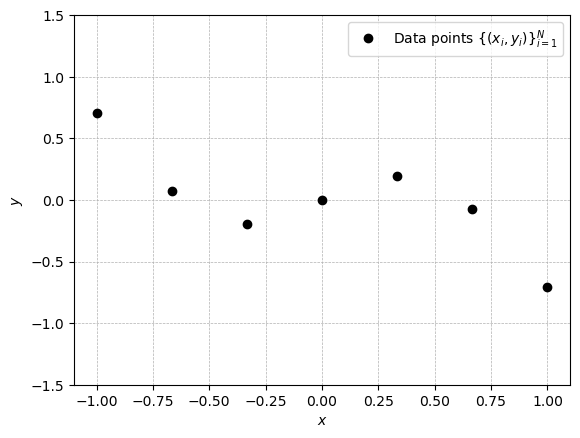

In [148]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

We wish to fit a polynomial model $m(\cdot;\theta)$ of degree $n=3$ (overdetermined) and $n=9$ (underdetermined) to the data points  $\{(x_{i},y_{i})\}_{i=1}^{N}$ by solving optimization problem (1) or equivalently (2) in __Exercise 1__ above.

---
__a)__ First, do this by implementing the GD method. The GD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$
- For $k\geq 0$:
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} \nabla f(\theta_{k})$ for some $\gamma_{k}>0$.

Pick $\theta_{0} = 0$ as the initial point, and try the constant step size

1. $\gamma_{k} = 1 / \beta$,

and run for $10^5$ iterations. Here, $\beta$ is the smoothness parameter from __Exercise 1__ above. Plot, in log-linear scale, both

- $f(\theta_{k})-f(\theta^{*})$ and
- $f(\overline{\theta}_{k})-f(\theta^{*})$ where $\overline{\theta}_{k} = \frac{1}{k+1}\sum_{l=0}^{k}\theta_{l}$, (Hint: use [sequential average computation](https://math.stackexchange.com/questions/106313/regular-average-calculated-accumulatively))

as a function of iteration number $k$. Give comments:
- Describe any difference between the $n=3$ (overdetermined) and $n=9$ (underdetermined) cases.

_Hint:_ What is $f(\theta^{*})$ in the overdetermined and underdetermined case, respectively? 

__Solution:__ 

_Fill in your solution here!_

[ 3.27715980e-17  5.19095925e-01  1.55522375e-17 -1.23974547e+00]


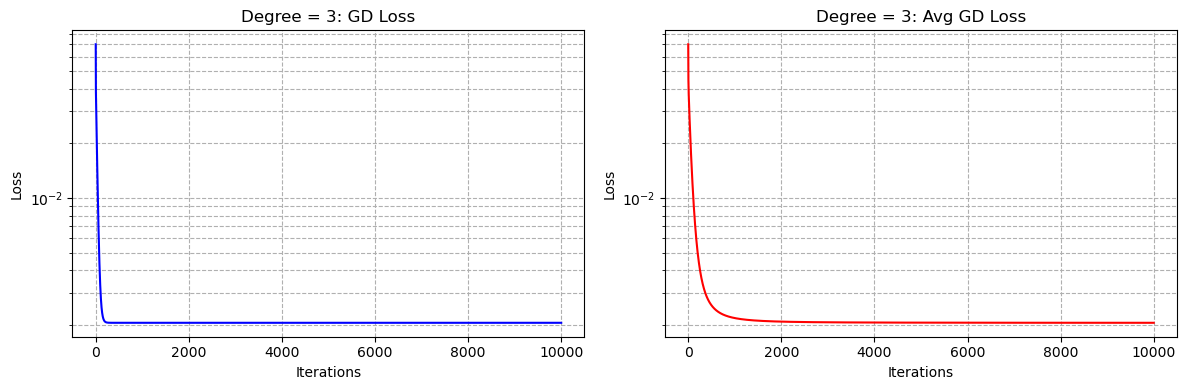

[-9.40680917e-18  7.07465769e-01  5.65109242e-17 -1.65223393e+00
  5.59973612e-16 -5.32378440e-01 -2.84338436e-17  2.06291877e-01
 -5.39550796e-16  5.61362769e-01]


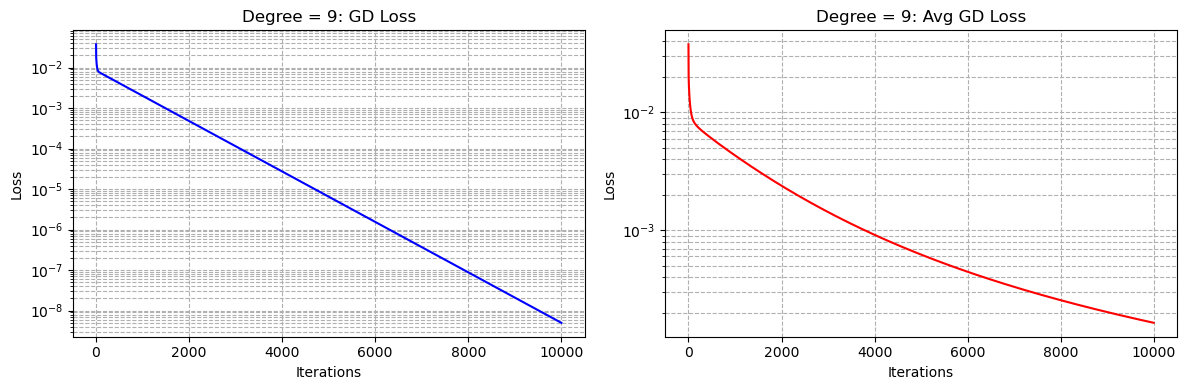

The GD method converges for both the under- & overparameterized case, this is in accordance with theory as the problem is convex
The underparameterized case converges to the uniqe solution faster while the overparameterized case reaches a much smaller choice of theta
From the graph "Degree = 9: GD Loss" we can conclude that it will converge towards zero as the iteration goes towards infinity.
From the theory discussion in assigment 1d the solution for the overparameterized problem must reach 0 loss and that any point with zero loss is a solution to the problem


In [149]:
# Write your code here

def polynomial_features(xs, degree):
    """Generate polynomial features."""
    return np.column_stack([xs**i for i in range(degree+1)])

def objective(X, y, theta):
    """Compute the least squares objective."""
    residuals = X @ theta - y
    return np.linalg.norm(residuals, 2)**2/N

def gradient(X, y, theta):
    """Compute the gradient of the least squares objective."""
    residuals = X @ theta - y
    return 2 * X.T @ residuals / N

def gradient_descent(X, y, gamma, beta, iterations=10000):
    theta = np.zeros(X.shape[1])
    thetas = []
    for _ in range(iterations):
        grad = gradient(X, y, theta)
        theta = theta - gamma * grad
        thetas.append(theta)
    return np.array(thetas)

def compute_averaged_thetas(thetas):
    averaged_thetas = np.zeros_like(thetas)
    running_sum = np.zeros(thetas.shape[1])
    
    for i in range(len(thetas)):
        running_sum += thetas[i]
        averaged_thetas[i] = running_sum / (i + 1)
    
    return averaged_thetas
def compute_objectives_for_averaged_thetas(X, y, averaged_thetas):
    objectives = []
    for theta in averaged_thetas:
        obj = objective(X, y, theta)
        objectives.append(obj)
    print(theta)
    return np.array(objectives)


for degree in [3, 9]:
    X = polynomial_features(xs, degree)
    beta = 2 * np.linalg.norm(X.T @ X) / N
    gamma = 1 / beta
    thetas = gradient_descent(X, ys, gamma, beta)
    
    losses = [objective(X, ys, theta) for theta in thetas]
    avg_losses = compute_objectives_for_averaged_thetas(X, ys, compute_averaged_thetas(thetas))
    
    # Create side-by-side plots
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=100, figsize=(12, 4))
    
    # Plot for normal GD loss
    ax1.plot(losses, label='GD loss', color='blue')
    ax1.set_yscale('log')
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss')
    ax1.set_title(f"Degree = {degree}: GD Loss")
    ax1.grid(True, which="both", ls="--")
    
    # Plot for average GD loss
    ax2.plot(avg_losses, label='Avg GD loss', color='red')
    ax2.set_yscale('log')
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel('Loss')
    ax2.set_title(f"Degree = {degree}: Avg GD Loss")
    ax2.grid(True, which="both", ls="--")
    
    plt.tight_layout()
    plt.show()

print('''The GD method converges for both the under- & overparameterized case, this is in accordance with theory as the problem is convex
The underparameterized case converges to the uniqe solution faster while the overparameterized case reaches a much smaller choice of theta
From the graph "Degree = 9: GD Loss" we can conclude that it will converge towards zero as the iteration goes towards infinity.
From the theory discussion in assigment 1d the solution for the overparameterized problem must reach 0 loss and that any point with zero loss is a solution to the problem''')

---
__b)__ Next, do this by implementing the SGD method. The SGD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$
- For $k\geq 0$:
    - Pick $i\in\{1,\ldots,N\}$ uniformly at random
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} \nabla f_{i}(\theta_{k})$ for some $\gamma_{k}>0$.

Pick $\theta_{0} = 0$ and try the step sizes

1. $\gamma_{k} = \frac{0.1}{\beta}$,
2. $\gamma_{k} = \frac{0.1}{\beta(k+1)}$,
3. $\gamma_{k} = \frac{0.1}{\beta(\lfloor k/1000\rfloor+1)}$, where $\lfloor \cdot \rfloor$ is the floor function,

and run for $10^5 N$ iterations. Plot, in log-linear scale, both

- $f(\theta_{k})-f(\theta^{*})$ and
- $f(\overline{\theta}_{k})-f(\theta^{*})$ where $\overline{\theta}_{k} = \frac{1}{k+1}\sum_{l=0}^{k}\theta_{l}$,

as a function of iteration number $k$. Give comments:
- Does the step sizes matter? 
- Is there a difference between the $n=3$ (overdetermined) and $n=9$ (underdetermined) cases. 
- Which combination worked best? 
- Which combination of $\gamma_{k}$ and $n$ (i.e. overdetermined or underdetermined) corresponds the most to training of neural networks? This question qualitative and has no unique answer.

__Solution:__ 

_Fill in your solution here!_

[ 1.03502078e-04  5.23534708e-01 -1.56778283e-04 -1.24511448e+00]
[-0.0073496  -0.11759543 -0.00440151 -0.13130321]
[-1.29419187e-04  5.22538903e-01  2.23403671e-04 -1.24395229e+00]


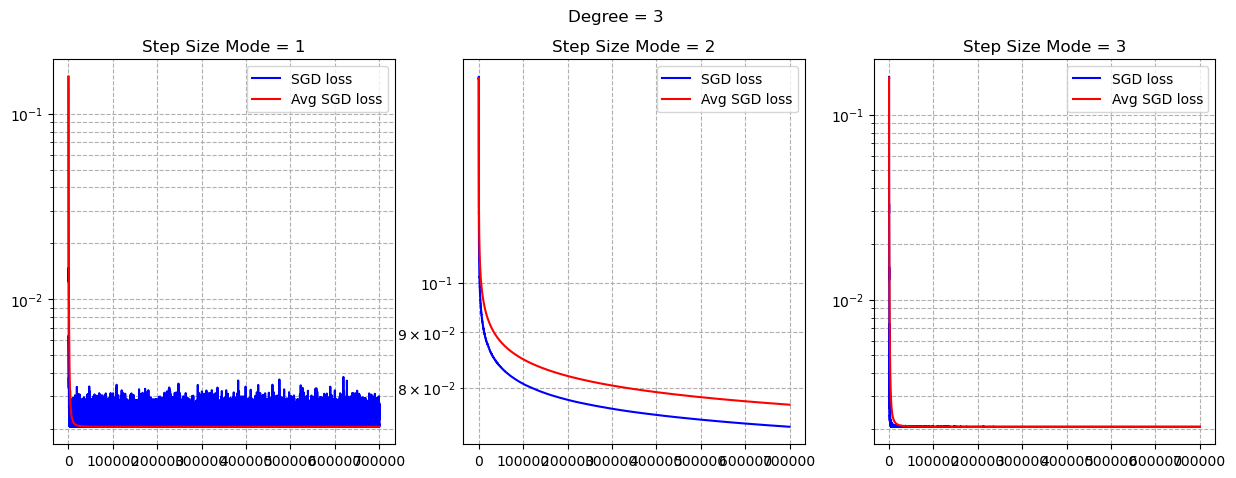

[-2.32469986e-06  7.86253077e-01  1.53703791e-04 -1.86411413e+00
 -5.01459850e-04 -5.76569168e-01  1.70115410e-05  2.69615922e-01
  3.37404963e-04  6.76136282e-01]
[ 0.00020773 -0.06990657  0.00530391 -0.07585808  0.00649495 -0.07585301
  0.00692203 -0.0755563   0.00710048 -0.07539171]
[-1.64542046e-04  3.76759631e-01  1.07242190e-03 -7.54181506e-01
 -1.10296266e-03 -3.46069973e-01 -2.17480217e-04 -6.34923989e-02
  3.81880874e-04  7.33414865e-02]


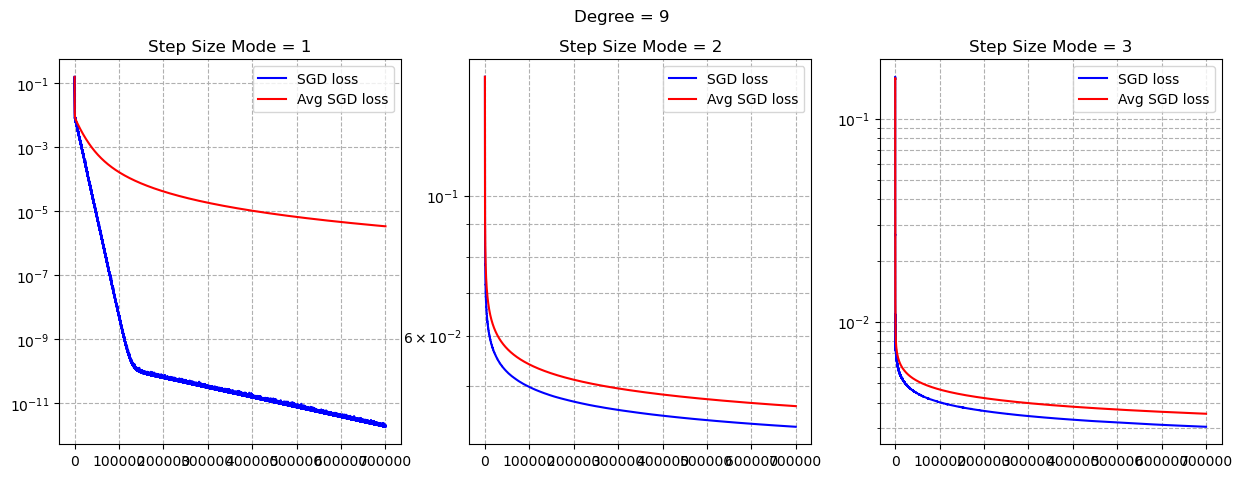

In [150]:
def stochastic_gradient(X, y, theta, i):
    """Compute the gradient for a single point."""
    x_i, y_i = X[i], y[i]
    residual = theta.T@x_i - y_i
    return 2 * x_i.T * residual

def stochastic_gradient_descent(X, y, gamma, beta, iterations=10000, step_size_mode=1):
    N, n = X.shape
    theta = np.zeros(n)
    thetas = []
    for k in range(iterations):
        i = np.random.randint(0, N)  # pick a random sample
        grad = stochastic_gradient(X, y, theta, i)
        
        # Select the step size based on the current iteration k
        if step_size_mode == 1:
            gamma_k = 0.1 / beta
        elif step_size_mode == 2:
            gamma_k = 0.1 / (beta * (k + 1))
        elif step_size_mode == 3:
            gamma_k = 0.1 / (beta * (np.floor(k/1000) + 1)) #floor returns the lower bound integer
        
        theta = theta - gamma_k * grad
        thetas.append(theta)
    return np.array(thetas)


def plot_experiment(X, y, degree, gamma, beta, iterations):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=100)
    
    for step_size_mode in [1, 2, 3]:
        thetas = stochastic_gradient_descent(X, y, gamma, beta, iterations, step_size_mode)
        losses = [objective(X, ys, theta) for theta in thetas]
        avg_losses = compute_objectives_for_averaged_thetas(X, ys, compute_averaged_thetas(thetas))
        
        ax = axs[step_size_mode - 1]
        ax.plot(losses, label='SGD loss', color='blue')
        ax.plot(avg_losses, label='Avg SGD loss', color='red')
        ax.set_yscale('log')
        ax.set_title(f"Step Size Mode = {step_size_mode}")
        ax.legend()
        ax.grid(True, which="both", ls="--")
        
    plt.suptitle(f"Degree = {degree}")
    plt.show()

for degree in [3, 9]:
    X = polynomial_features(xs, degree)
    beta = 2 * np.linalg.norm(X.T @ X)/N
    gamma = 0.1 / beta
    plot_experiment(X, ys, degree, gamma, beta, iterations=100000*N)


 - Does the step sizes matter? 
    - Yes there is a big difference when looking at different stepsizes. One big difference is when degree = 9 and stepsize = 1 it converges much faster.  
- Is there a difference between the $n=3$ (overdetermined) and $n=9$ (underdetermined) cases. 
    - Yess the overdetermined case shows a much higher variance between each iteration compared to $n=9$.
- Which combination worked best? 
    - As mentioned in a it seems like the best fit for the model is where $n=9$ and $\gamma_{k} = \frac{0.1}{\beta}$
- Which combination of $\gamma_{k}$ and $n$ (i.e. overdetermined or underdetermined) corresponds the most to training of neural networks? This question qualitative and has no unique answer.
    - Typical for training of neural networks is underdetermined cases so in our case where $n=9$ and it would be good to lower the computing cost to use bigger steps however there is a risk of overshooting. 

---
### Exercise 3: Fitting points in $\mathbb{R}$ using fully connected feedforward neural networks

Again, we consider the data points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:


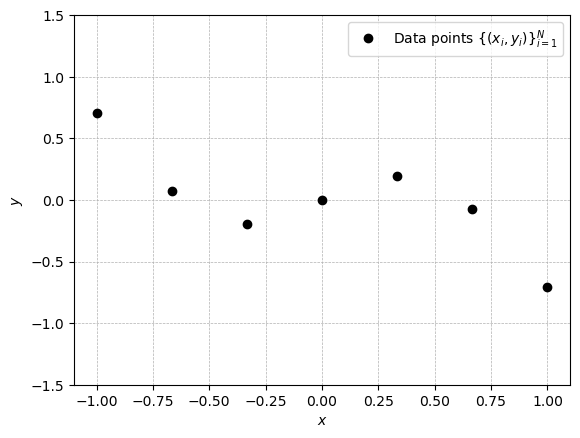

In [151]:
N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

Polynomial fitting as in __Exercise 1__ and __Exercise 2__ gives:

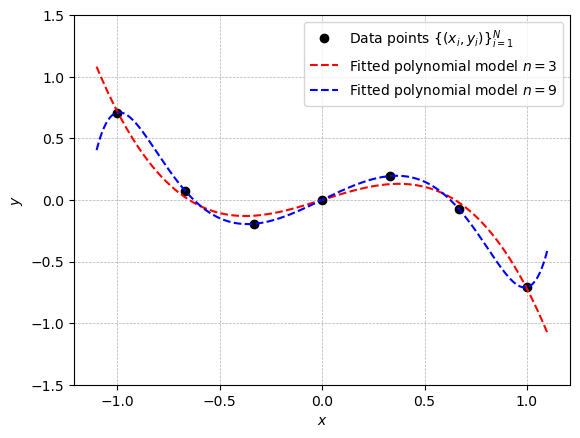

In [152]:
theta_star_n_9 = np.array([0,  0.8, 0, -1.9, 0, -0.583957507, 0, 0.28, 0, 0.695322536])
theta_star_n_3 = np.array([0,  0.523557283,  0, -1.24520755])
x = np.linspace(-1.1, 1.1, num = 1000)

fig, axes = plt.subplots(dpi=100)

axes.plot(xs,ys,'ko')
axes.plot(x, np.polyval(np.flip(theta_star_n_3), x),'r--')
axes.plot(x, np.polyval(np.flip(theta_star_n_9), x),'b--')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Fitted polynomial model $n=3$', r'Fitted polynomial model $n=9$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

In this exercise, we are going to explore fitting of these data points using fully connected feedforward neural networks. We will do this by considering the problem

$$
\begin{align}\label{eq:3}\tag{3}
		\underset{\theta}{\mathrm{minimize}} \frac{1}{N}\sum_{i=1}^N L(m(x_i;\theta),y_i)
\end{align}
$$

where $L:\mathbb{R}\times\mathbb{R}\rightarrow\mathbb{R}$ is the least squares loss, i.e.

$$
\begin{align*}
L(u,y) = (u-y)^{2}
\end{align*}
$$

for each $u,y\in\mathbb{R}$ and $m(\cdot;\theta):\mathbb{R}\rightarrow\mathbb{R}$ is a fully connected feedforward neural network model, i.e.

$$
\begin{align*}
m(x;\theta) = W_{D}\sigma_{D-1}(W_{D-1}\sigma_{D-2}(...\sigma_1(W_1 x + b_{1})...)+b_{D-1})+b_{D}	
\end{align*}
$$

for each $x\in\mathbb{R}$, where $\sigma_i$ is an activation functions that act elements-wise, for each $i=1,\ldots,D-1$, and

$$
\begin{align*}
    \theta = (W_{1},b_1,\ldots,W_{D},b_{D})
\end{align*}
$$

such that

$$
\begin{align*}
    \begin{cases}
        W_{1}\in\mathbb{R}^{f_{1} \times 1}& \text{ and }\quad b_{1} \in\mathbb{R}^{f_1}\\	
        W_{i}\in\mathbb{R}^{f_{i} \times f_{i-1}}& \text{ and }\quad b_{i} \in\mathbb{R}^{f_i} \quad\text{ for }\quad i=2,\ldots,D-1 \\
        W_{D}\in\mathbb{R}^{1 \times f_{D-1}}& \text{ and }\quad b_{D} \in\mathbb{R}.
    \end{cases}
\end{align*}
$$

In particular, we will study how the trained model $m(\cdot;\theta)$ depends on:
- The widths ($f_{i}$) and depth ($D$)
- Different activation functions ($\sigma_{i}$)
- Different initial points $\theta_{0}$ used in training
- Different training algorithms such as SGD and and Adam

We will also study:
- How the loss landscape of (3) looks along different directions at an "optimal point" of (3). (Note that we in general have no guarantees that our optimization algorithms will reach a true optimal point of (3) since the problem in nonconvex in general.)

_Remark:_
We will train the models using `pytorch`. `pytorch` is a widely used library or *module* for doing machine learning in python.
It allows the user to construct, train and evaluate neural networks.

- You will need to [install](https://anaconda.org/pytorch/pytorch) `pytorch`

Take a quick look at `pytorch`'s
- [tutorials](https://pytorch.org/tutorials/)
- [documentation](https://pytorch.org/docs/stable/index.html)

---
`pytorch` expects to get data from a `DataLoader` object. Below we create a `DataLoader` and provide it with our data:

In [153]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import optim

torch_xs = torch.tensor(xs.reshape((N,1)), dtype=torch.float32)
torch_ys = torch.tensor(ys.reshape((N,1)), dtype=torch.float32)
dataset = TensorDataset(torch_xs, torch_ys)
data_loader = DataLoader(dataset, batch_size=len(xs)) # other batch sizes are of course allowed

Typically in `pytorch`, models are defined as a child of the `nn.Module` class. Below, we create a model with:
- Depth $D=2$
- Width $f_1=10$
- ReLU as activation function 

In [154]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x

# Create an instance of the model class.
model = model()

In machine learning, the objective function in (3) is sometimes itself called a loss function. In fact, it is already [implemented](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) in `pytorch` and we create the corresponding loss function object below:

In [155]:
loss_fn = nn.MSELoss()

`torch.optim` is a `pytorch` package implementing various optimization algorithms. Below we create an optimizer object that allows us to take a SGD step with step-size/learning rate equal to $0.05$.

In [156]:
optimizer = optim.SGD(model.parameters(), lr=0.05)

Once we have defined the data loader, the model, the loss function and the optimizer as above, we can train the network by simply following these steps in a loop:
1. Sample a batch of data from our dataset
2. Compute the model's prediction on the batch
3. Compute the loss of the prediction w.r.t. ground-truth
4. Backpropagate the loss through the model's parameters
5. Perform one training step.

We will do this for $2000$ epochs.

In [157]:
for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:

        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
        
        # 2. Compute the model's prediction on the batch
        pred = model(batch_x)
        
        # 3. Compute the loss of the prediction w.r.t. ground-truth
        loss = loss_fn(pred, batch_y)
        
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_in_epoch.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer.zero_grad()

    # Every 100th epoch, display progress
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

Epoch: 0	Loss: 0.26000213623046875
Epoch: 100	Loss: 0.07448191195726395
Epoch: 200	Loss: 0.0703185424208641
Epoch: 300	Loss: 0.06674187630414963
Epoch: 400	Loss: 0.06360726058483124
Epoch: 500	Loss: 0.06091760843992233
Epoch: 600	Loss: 0.05870761722326279
Epoch: 700	Loss: 0.05717318505048752
Epoch: 800	Loss: 0.05595384165644646
Epoch: 900	Loss: 0.05487595126032829
Epoch: 1000	Loss: 0.05388183146715164
Epoch: 1100	Loss: 0.0529688224196434
Epoch: 1200	Loss: 0.05214560776948929
Epoch: 1300	Loss: 0.051423441618680954
Epoch: 1400	Loss: 0.05081956461071968
Epoch: 1500	Loss: 0.050363827496767044
Epoch: 1600	Loss: 0.05002666637301445
Epoch: 1700	Loss: 0.04977184906601906
Epoch: 1800	Loss: 0.049585334956645966
Epoch: 1900	Loss: 0.04945290833711624


Below we plot trained model:

Traing loss: 0.04936


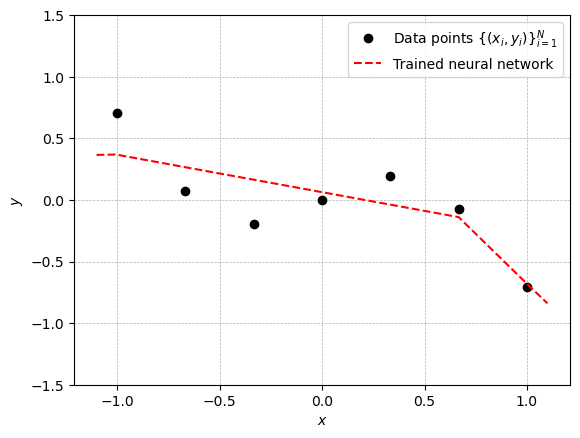

In [158]:
with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Traing loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

__a)__ First, we experiment with the widths ($f_{i}$) and depth ($D$).

Choose widths ($f_{i}$) and depth ($D$) such that:
- the network becomes underparameterized (motive why it is underparameterized)
- the network becomes overparameterized (motive why it is overparameterized)

and train the model as above.

In this subproblem, keep the activation functions fixed as ReLU. However, you are free to experiment with the learning rate and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

_Fill in your solution here!_


SGD training of the underparameterized model:
Epoch: 0	Loss: 1.0814902782440186
Epoch: 100	Loss: 0.20392043888568878
Epoch: 200	Loss: 0.17991791665554047
Epoch: 300	Loss: 0.17186345160007477
Epoch: 400	Loss: 0.16782638430595398
Epoch: 500	Loss: 0.16540151834487915
Epoch: 600	Loss: 0.16378359496593475
Epoch: 700	Loss: 0.16262726485729218
Epoch: 800	Loss: 0.16175957024097443
Epoch: 900	Loss: 0.16108371317386627
Epoch: 1000	Loss: 0.16054290533065796
Epoch: 1100	Loss: 0.1601003259420395
Epoch: 1200	Loss: 0.15973146259784698
Epoch: 1300	Loss: 0.15941928327083588
Epoch: 1400	Loss: 0.15915168821811676
Epoch: 1500	Loss: 0.15891973674297333
Epoch: 1600	Loss: 0.15871676802635193
Epoch: 1700	Loss: 0.15853767096996307
Epoch: 1800	Loss: 0.1583784520626068
Epoch: 1900	Loss: 0.15823598206043243

SGD training of the overparameterized model:
Epoch: 0	Loss: 0.19012001156806946
Epoch: 100	Loss: 0.08253464847803116
Epoch: 200	Loss: 0.0667421966791153
Epoch: 300	Loss: 0.05912672355771065
Epoch: 400	Loss: 

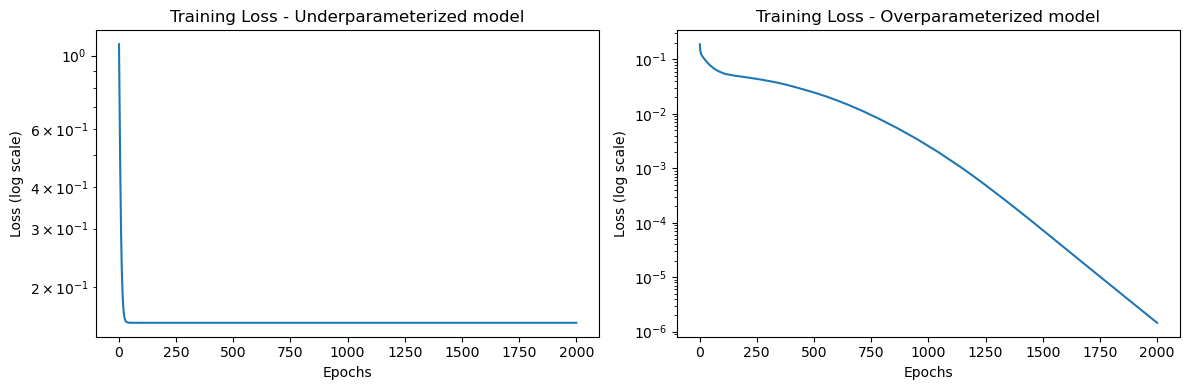

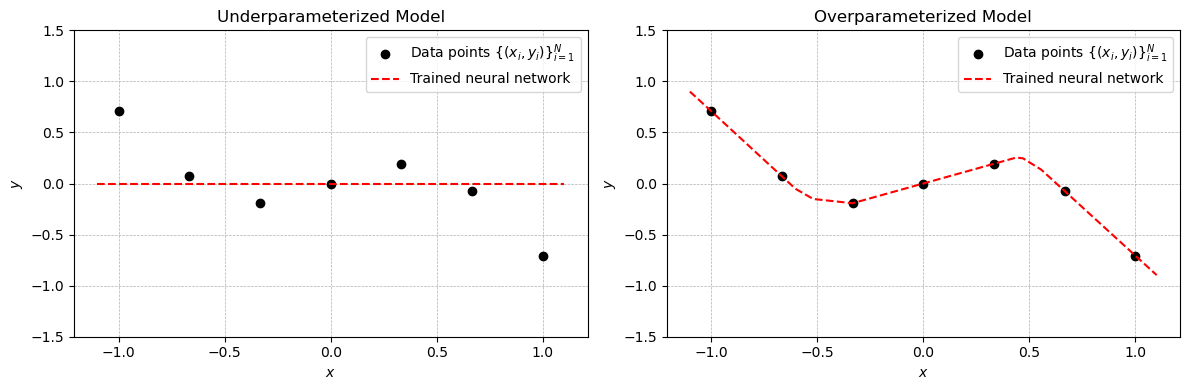

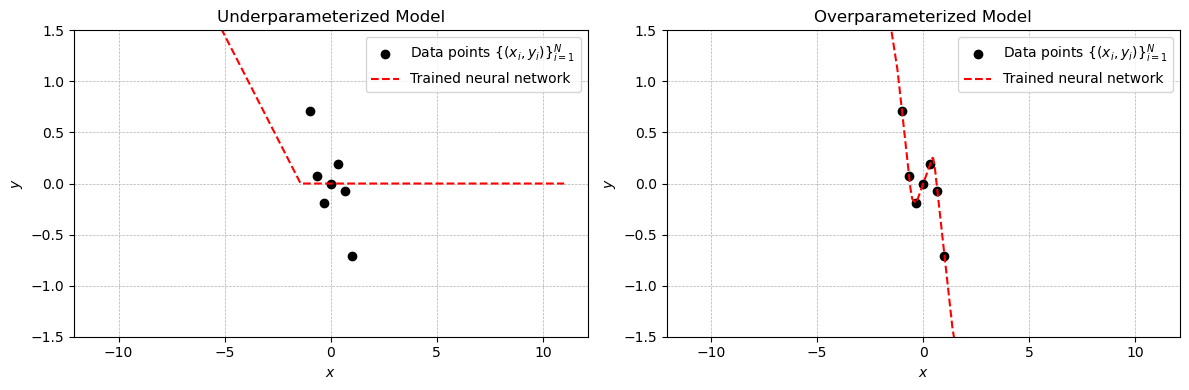

In [159]:
# Define model_under
class model_under(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=1)
        self.linear2 = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x
    
# Define model_over    
class model_over(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=10)
        self.linear3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)
        return x

# Create an instance of each model
model_under = model_under()
model_over = model_over()

# Fetch the loss function
loss_fn = nn.MSELoss()

# Fetch SGD optimizers with constant step size 0.05
optimizer_under = optim.SGD(model_under.parameters(), lr=0.05)
optimizer_over = optim.SGD(model_over.parameters(), lr=0.05)

# Train model_under for 2000 epochs
print('\nSGD training of the underparameterized model:')
losses_under = []
for epoch in range(2000):
    for batch in data_loader:

        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
        
        # 2. Compute the model's prediction on the batch
        pred = model_under(batch_x)
        
        # 3. Compute the loss of the prediction w.r.t. ground-truth
        loss = loss_fn(pred, batch_y)
        
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_under.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer_under.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer_under.zero_grad()

    # Every 100th epoch, display progress
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_under)/len(losses_under)))
        
# Train model_over for 2000 epochs
print('\nSGD training of the overparameterized model:')
losses_over = []
for epoch in range(2000):
    for batch in data_loader:

        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
        
        # 2. Compute the model's prediction on the batch
        pred = model_over(batch_x)
        
        # 3. Compute the loss of the prediction w.r.t. ground-truth
        loss = loss_fn(pred, batch_y)
        
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_over.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer_over.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer_over.zero_grad()

    # Every 100th epoch, display progress
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_over)/len(losses_over)))
        
epochs_under = range(1, len(losses_under) + 1)
epochs_over = range(1, len(losses_over) + 1)

# Create two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot model_under
axs[0].semilogy(epochs_under, [loss.item() for loss in losses_under])
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss (log scale)')
axs[0].set_title('Training Loss - Underparameterized model')

# Plot model_over
axs[1].semilogy(epochs_over, [loss.item() for loss in losses_over])
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss (log scale)')
axs[1].set_title('Training Loss - Overparameterized model')

# Adjust layout
plt.tight_layout()
plt.show() 

# Model predictions for model_under
with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num=1000)
    torch_x = torch.tensor(x.reshape((1000, 1)), dtype=torch.float32)
    y_pred_under = model_under(torch_x).numpy()

# Model predictions for model_over
with torch.no_grad():
    y_pred_over = model_over(torch_x).numpy()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4), dpi=100)

# Plot for model_under
axs[0].plot(xs, ys, 'ko')
axs[0].plot(x, y_pred_under, 'r--')
axs[0].legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Trained neural network'])
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y$')
axs[0].grid(linestyle='dashed', linewidth=0.5)
axs[0].set_ylim([-1.5, 1.5])
axs[0].set_title('Underparameterized Model')

# Plot for model_over
axs[1].plot(xs, ys, 'ko')
axs[1].plot(x, y_pred_over, 'r--')
axs[1].legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Trained neural network'])
axs[1].set_xlabel('$x$')
axs[1].set_ylabel('$y$')
axs[1].grid(linestyle='dashed', linewidth=0.5)
axs[1].set_ylim([-1.5, 1.5])
axs[1].set_title('Overparameterized Model')

# Adjust layout
plt.tight_layout()
plt.show()

# Model predictions for model_under
with torch.no_grad():
    x = np.linspace(-11, 11, num=1000)
    torch_x = torch.tensor(x.reshape((1000, 1)), dtype=torch.float32)
    y_pred_under = model_under(torch_x).numpy()

# Model predictions for model_over
with torch.no_grad():
    y_pred_over = model_over(torch_x).numpy()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4), dpi=100)

# Plot for model_under
axs[0].plot(xs, ys, 'ko')
axs[0].plot(x, y_pred_under, 'r--')
axs[0].legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Trained neural network'])
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y$')
axs[0].grid(linestyle='dashed', linewidth=0.5)
axs[0].set_ylim([-1.5, 1.5])
axs[0].set_title('Underparameterized Model')

# Plot for model_over
axs[1].plot(xs, ys, 'ko')
axs[1].plot(x, y_pred_over, 'r--')
axs[1].legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Trained neural network'])
axs[1].set_xlabel('$x$')
axs[1].set_ylabel('$y$')
axs[1].grid(linestyle='dashed', linewidth=0.5)
axs[1].set_ylim([-1.5, 1.5])
axs[1].set_title('Overparameterized Model')

# Adjust layout
plt.tight_layout()
plt.show()

### __3a: Models__
_We have two different interpretations of the non-convex model presented in this exercise. One is that $f_i > 1$ would yield a model $m(x,\theta) R \rightarrow R^{f_i}$. In this case, a non-trainable summation is needed to arrive at an output in $R$. The other interpretation is that no matter the width $f_i$, the model output domain is always $R$, e.g. $m(x,\theta) R \rightarrow R$. This makes a difference when calculating number of parameters $N$ in a model, as the last summation is trainable in the latter interpretation. All following discussion is based on the interpretation $m(x,\theta) R \rightarrow R$._

The dataset has $n=7$ entries. An overparameterized model has 8 or more parameters ($N > n+1$), while an underparameterized model has 6 or fewer parameters ($N < n+1$).

One underparameterized neural network is the dense model with one hidden layers of width one, which together with the output node yields $f_{i} = 1, D = 2$.

- Since the input space is $x \in R$, the node in the first layer will have two parameters; the weight to the input and the weight to the bias $b_1$.

- The output layer will have two parameters, one for the previous hidden layer and one for the bias $b_3$.

In total, this model has $2 + 2 = 4$ parameters. We call this model $m_{under}$.

One overparameterized neural network is the dense model with two hidden layers of width eight, plus the output node. Then $f_{i} = 10, D = 3$.

- Since the input space is $x \in R$, each node in the first layer will have two parameters; the weight to the input and the weight to the bias $b_1$. This gives a total of 20 parameters in the first layer.

- The second layer will have eleven parameters per node; ten for each connection to the previous layer and one to the bias node $b_2$. This gives a total of 110 weights in the second layer.

- The output layer will have eleven parameters, eight for the previous hidden layer and one for the bias $b_3$.

In total, this model has $10*2 + 10*11 + 1*11 = 141$ parameters. We call this model $m_{over}$.

### __3a: Analysis__

Above, the models are trained with SGD with a constant step-size of 0.05 for 2000 epoches.

We observe that the overparameterized model reaches a much smaller loss than the underparameterized model, several order of magnitudes smaller. This is alligment with theory as discussed earlier. The overparameterized problem has the possibility to reach zero loss with enough training.

When plotting the models together with the data, it is noted that $m_{under}$ suffers from not being flexible enough. It can't fit to the training data and fails to find the qubic relationship. $m_{over}$ fits the training data well, which it should since the loss is close to zero.

Importantly, these results tell us nothing about the generalization performance of the two models. It is likely (but not necesarrialy true) that the overparameterized model suffer worse generalizationd due to overtraing. To generalize well is the goal of the model, not to find a perfect solution in training. To analyze further, the models were plotted in a wider input space. The smallest and the largest datapoint available hints that $m_over$ actually did a fair job, but again, we need more data to verify generalization.

__b)__ Second, we will try out different activation functions ($\sigma_{i}$).

Train two overparameterized networks with the same widths and depth, using
- ReLU activation at each layer for one of the networks, and
- 4 * sigmod activation at each layer for the other network.

You are free to experiment with the learning rate and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

_Fill in your solution here!_


LEARNING RATE: 0.02

SGD training of the overparameterized model with relu:
Epoch: 0	Loss: 0.23361988365650177
Epoch: 500	Loss: 0.08899268507957458
Epoch: 1000	Loss: 0.07183441519737244
Epoch: 1500	Loss: 0.06009675934910774

SGD training of the overparameterized model with sigmod:
Epoch: 0	Loss: 1.3646537065505981
Epoch: 500	Loss: 0.08374848961830139
Epoch: 1000	Loss: 0.07661232352256775
Epoch: 1500	Loss: 0.07416383177042007


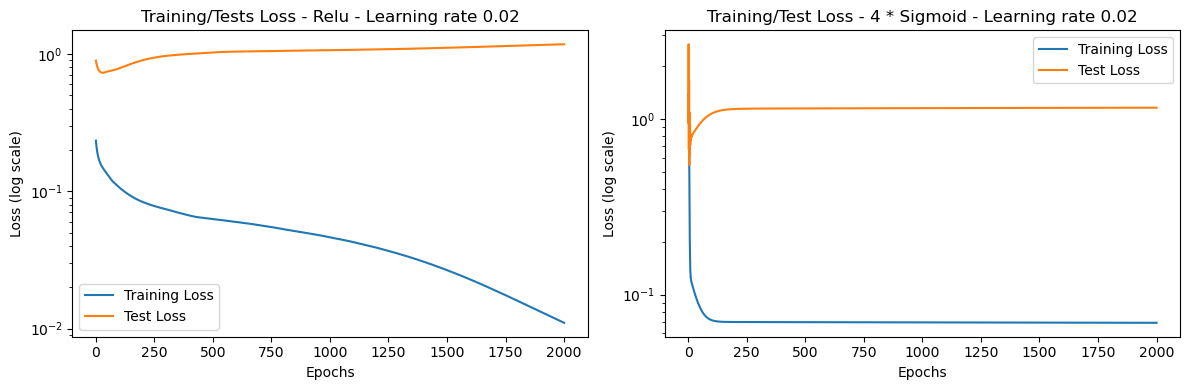

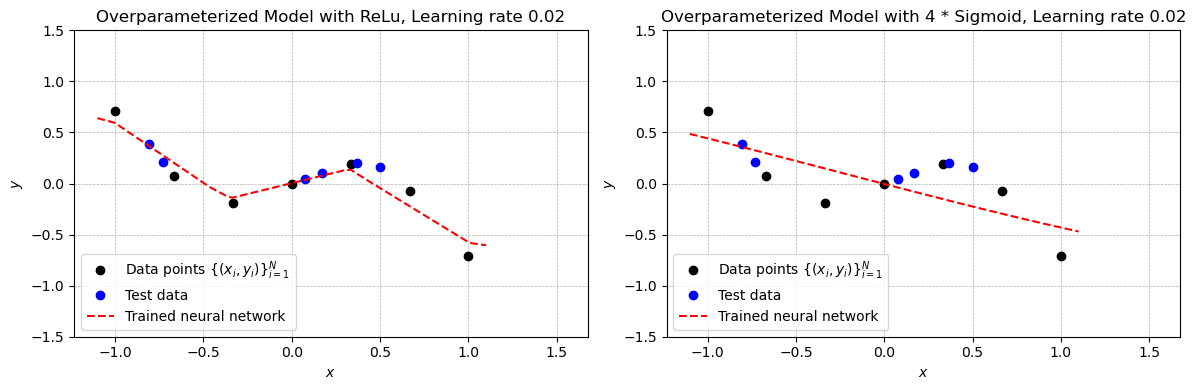

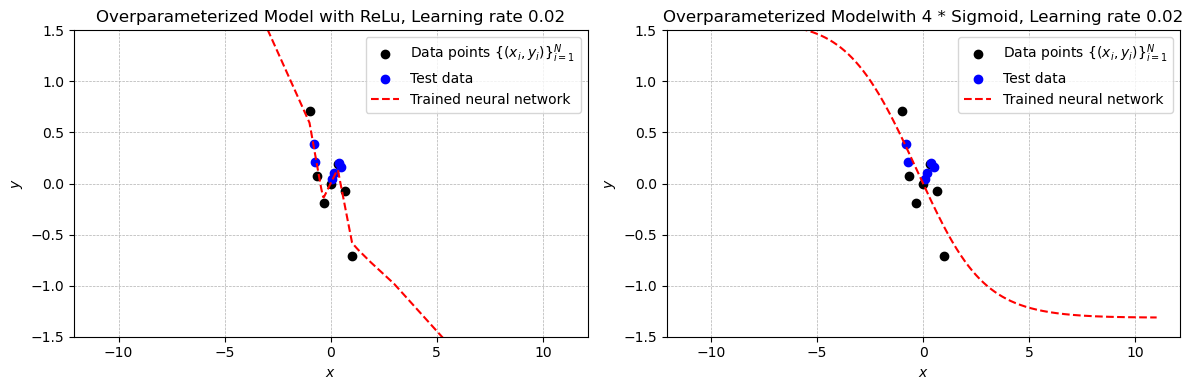


LEARNING RATE: 0.05

SGD training of the overparameterized model with relu:
Epoch: 0	Loss: 0.010985143482685089
Epoch: 500	Loss: 0.004110882058739662
Epoch: 1000	Loss: 0.0021600958425551653
Epoch: 1500	Loss: 0.0014427949208766222

SGD training of the overparameterized model with sigmod:
Epoch: 0	Loss: 0.06900948286056519
Epoch: 500	Loss: 0.23688530921936035
Epoch: 1000	Loss: 0.1545250564813614
Epoch: 1500	Loss: 0.12660712003707886


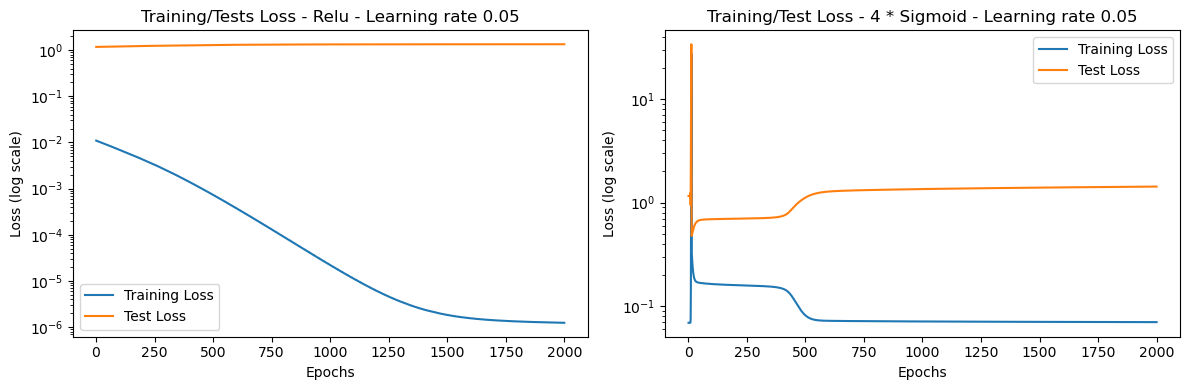

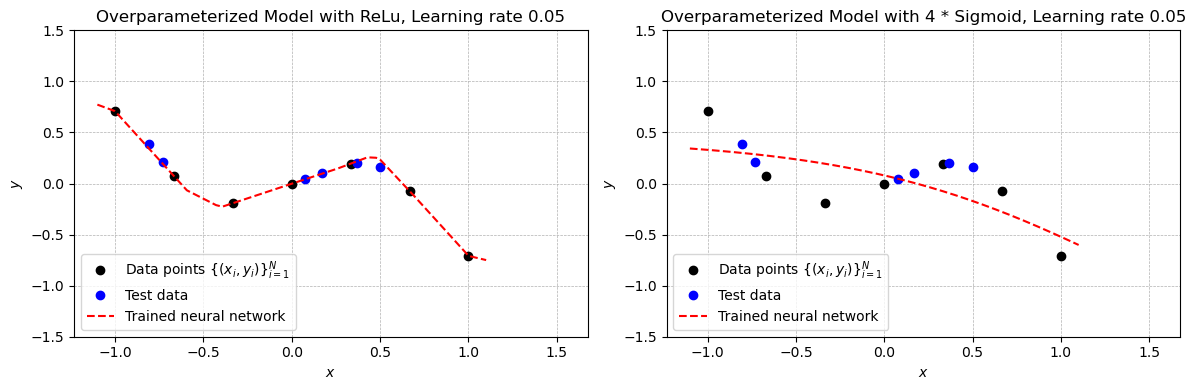

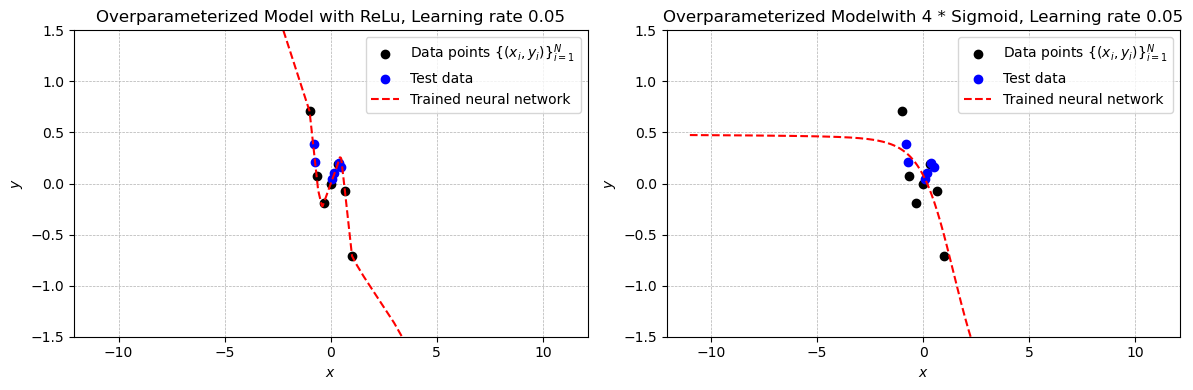


LEARNING RATE: 0.1

SGD training of the overparameterized model with relu:
Epoch: 0	Loss: 1.2401412732288009e-06
Epoch: 500	Loss: 0.0016063981456682086
Epoch: 1000	Loss: 0.0008047508308663964
Epoch: 1500	Loss: 0.0005371046718209982

SGD training of the overparameterized model with sigmod:
Epoch: 0	Loss: 0.07002885639667511
Epoch: 500	Loss: 0.06973471492528915
Epoch: 1000	Loss: 0.06949952244758606
Epoch: 1500	Loss: 0.06929245591163635


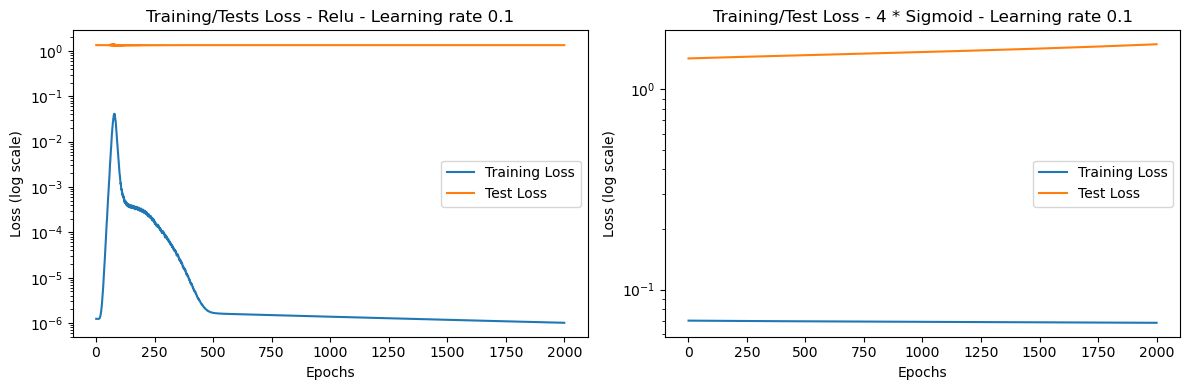

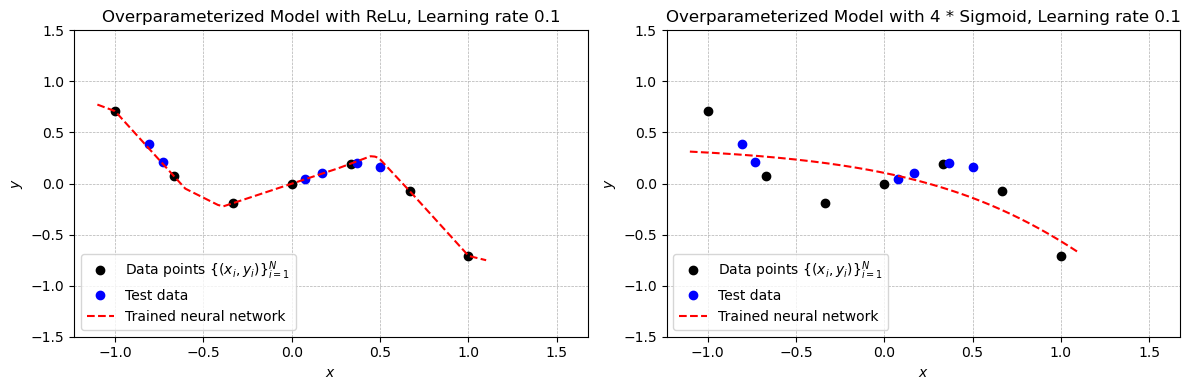

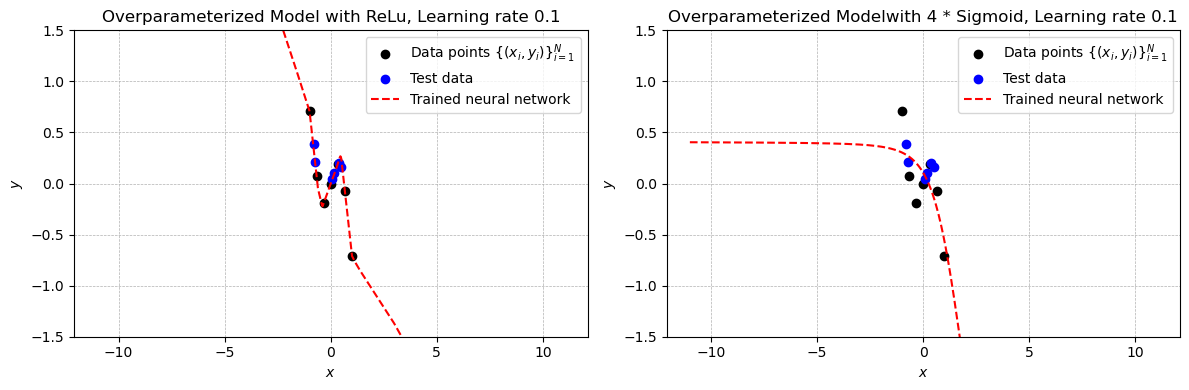


LEARNING RATE: 0.3

SGD training of the overparameterized model with relu:
Epoch: 0	Loss: 1.0137255230802111e-06
Epoch: 500	Loss: 0.06626119464635849
Epoch: 1000	Loss: 0.033576831221580505
Epoch: 1500	Loss: 0.022396354004740715

SGD training of the overparameterized model with sigmod:
Epoch: 0	Loss: 0.0683106929063797
Epoch: 500	Loss: 0.10788535326719284
Epoch: 1000	Loss: 0.08712560683488846
Epoch: 1500	Loss: 0.07874476164579391


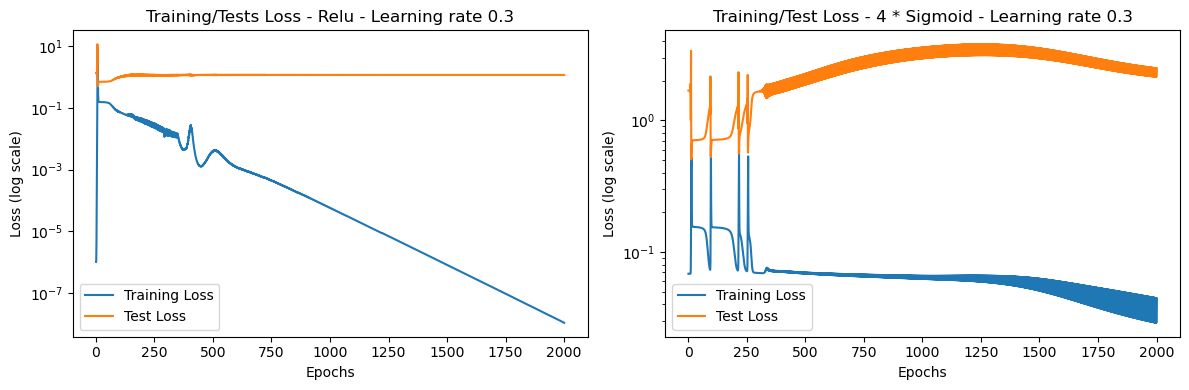

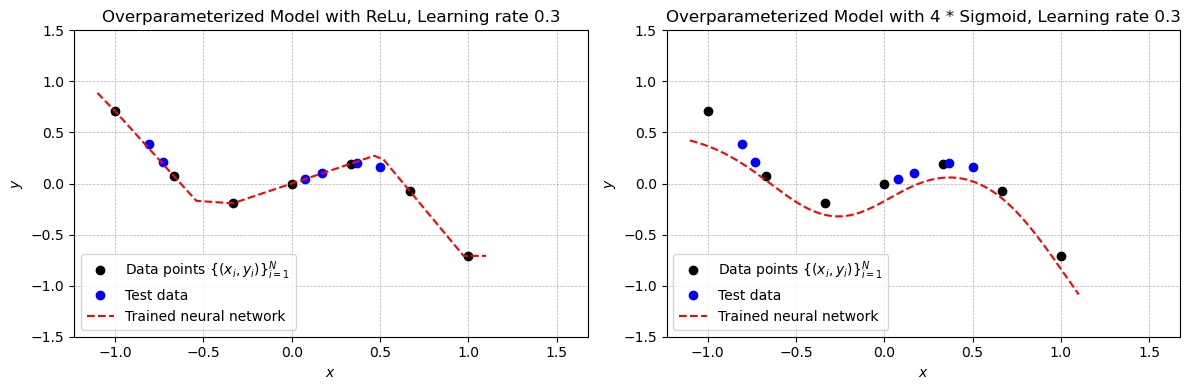

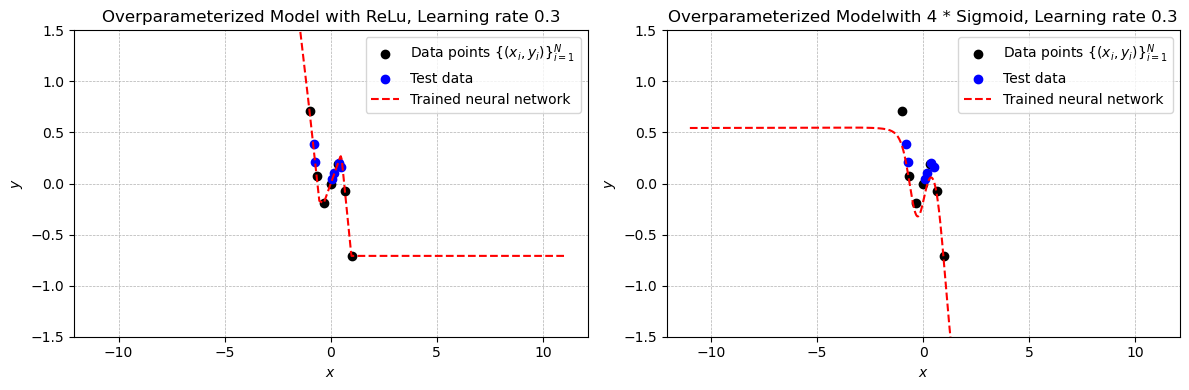

In [160]:
# Write your code himport torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import optim

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Training data
N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's
torch_xs = torch.tensor(xs.reshape((N,1)), dtype=torch.float32)
torch_ys = torch.tensor(ys.reshape((N,1)), dtype=torch.float32)
dataset = TensorDataset(torch_xs, torch_ys)
data_loader = DataLoader(dataset, batch_size=len(xs)) # other batch sizes are of course allowed

# Test Data - Gauissian noises 
xs_test = xs + np.random.normal(0, 0.3, N)
N_test = len(xs_test)
ys_test = np.sin(5*xs_test)*np.exp(np.abs(2*xs_test)) / 10 # the y_i's
torch_xs_test = torch.tensor(xs_test.reshape((N_test,1)), dtype=torch.float32)
torch_ys_test = torch.tensor(ys_test.reshape((N_test,1)), dtype=torch.float32)
dataset_test = TensorDataset(torch_xs_test, torch_ys_test)
data_loader_test = DataLoader(dataset_test, batch_size=len(xs_test)) #No minibatches on test data 

# Define overparameterized model with ReLu
class model_over_relu(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=10)
        self.linear3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)
        return x
    
# Define Define overparameterized model with 4*sigmoid  
class model_over_sigmod(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=10)
        self.linear3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = 4*F.sigmoid(x)
        x = self.linear2(x)
        x = 4*F.sigmoid(x)
        x = self.linear3(x)
        return x

# Create an instance of each model
model_over_relu = model_over_relu()
model_over_sigmod = model_over_sigmod()

# Fetch the loss function
loss_fn = nn.MSELoss()

learningRates = [0.02,0.05,0.1,0.3]
for lr in learningRates:
    print(f'\nLEARNING RATE: {lr}')
    # Fetch SGD optimizers
    optimizer_over_relu = optim.SGD(model_over_relu.parameters(), lr)
    optimizer_over_sigmod = optim.SGD(model_over_sigmod.parameters(), lr)

    # Train model_over_relu for 2000 epochs
    print('\nSGD training of the overparameterized model with relu:')
    losses_over_relu = []
    testlosses_over_relu = []
    for epoch in range(2000):
        for batch in data_loader:

            # 1. These are the sampled batches of inputs and ground-truth
            batch_x, batch_y = batch

            # 2. Compute the model's prediction on the batch
            pred = model_over_relu(batch_x)

            # 3. Compute the loss of the prediction w.r.t. ground-truth
            loss = loss_fn(pred, batch_y)

            # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
            losses_over_relu.append(loss)

            # 4. Backpropagation
            loss.backward()

            # 5. One step of SGD
            optimizer_over_relu.step()

            # Zero the gradients computed in the backpropagation, for starting new optimization step
            optimizer_over_relu.zero_grad()

        # Calculate and append test loss for each entry of the test dataset
        for test_data in data_loader_test: # Test_data contains all testdatapoints
            test_x, test_y = test_data
            test_pred = model_over_relu(test_x)
            test_loss = loss_fn(test_pred, test_y)
            testlosses_over_relu.append(test_loss)
        
        # Every 100th epoch, display progress
        if epoch % 500 == 0:
            print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_over_relu)/len(losses_over_relu)))

    # Train model_over for 2000 epochs
    print('\nSGD training of the overparameterized model with sigmod:')
    losses_over_sigmod = []
    testlosses_over_sigmod = []
    for epoch in range(2000):
        for batch in data_loader:

            # 1. These are the sampled batches of inputs and ground-truth
            batch_x, batch_y = batch

            # 2. Compute the model's prediction on the batch
            pred = model_over_sigmod(batch_x)

            # 3. Compute the loss of the prediction w.r.t. ground-truth
            loss = loss_fn(pred, batch_y)

            # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
            losses_over_sigmod.append(loss)

            # 4. Backpropagation
            loss.backward()

            # 5. One step of SGD
            optimizer_over_sigmod.step()

            # Zero the gradients computed in the backpropagation, for starting new optimization step
            optimizer_over_sigmod.zero_grad()
            
        # Calculate and append test loss for each entry of the test dataset
        for test_data in data_loader_test: # Test_data contains all testdatapoints
            test_x, test_y = test_data
            test_pred = model_over_sigmod(test_x)
            test_loss = loss_fn(test_pred, test_y)
            testlosses_over_sigmod.append(test_loss)
        # Every 100th epoch, display progress
        if epoch % 500 == 0:
            print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_over_sigmod)/len(losses_over_sigmod)))

    epochs_over_relu = range(1, len(losses_over_relu) + 1)
    epochs_over_sigmod = range(1, len(losses_over_sigmod) + 1)

    # Create two subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Plot model
    axs[0].semilogy(epochs_over_relu, [loss.item() for loss in losses_over_relu], label='Training Loss')
    axs[0].semilogy(epochs_over_relu, [test_loss.item() for test_loss in testlosses_over_relu], label='Test Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss (log scale)')
    axs[0].set_title(f'Training/Tests Loss - Relu - Learning rate {lr}')
    axs[0].legend()  # Add this line to show the legend


    # Plot model
    axs[1].semilogy(epochs_over_sigmod, [loss.item() for loss in losses_over_sigmod], label='Training Loss')
    axs[1].semilogy(epochs_over_sigmod, [test_loss.item() for test_loss in testlosses_over_sigmod], label='Test Loss')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss (log scale)')
    axs[1].set_title(f'Training/Test Loss - 4 * Sigmoid - Learning rate {lr}')
    axs[1].legend()  # Add this line to show the legend


    # Adjust layout
    plt.tight_layout()
    plt.show()

    # Model predictions for model_over_relu
    with torch.no_grad():
        x = np.linspace(-1.1, 1.1, num=1000)
        torch_x = torch.tensor(x.reshape((1000, 1)), dtype=torch.float32)
        y_pred_over_relu = model_over_relu(torch_x).numpy()

    # Model predictions for model_over
    with torch.no_grad():
        y_pred_over_sigmod = model_over_sigmod(torch_x).numpy()

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 4), dpi=100)

    # Plot for model_under
    axs[0].plot(xs, ys, 'ko')
    axs[0].plot(xs_test, ys_test, 'bo')
    axs[0].plot(x, y_pred_over_relu, 'r--')
    axs[0].legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Test data', r'Trained neural network'])
    axs[0].set_xlabel('$x$')
    axs[0].set_ylabel('$y$')
    axs[0].grid(linestyle='dashed', linewidth=0.5)
    axs[0].set_ylim([-1.5, 1.5])
    axs[0].set_title(f'Overparameterized Model with ReLu, Learning rate {lr}')

    # Plot for model_over
    axs[1].plot(xs, ys, 'ko')
    axs[1].plot(xs_test, ys_test, 'bo')
    axs[1].plot(x, y_pred_over_sigmod, 'r--')
    axs[1].legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$',  r'Test data', r'Trained neural network'])
    axs[1].set_xlabel('$x$')
    axs[1].set_ylabel('$y$')
    axs[1].grid(linestyle='dashed', linewidth=0.5)
    axs[1].set_ylim([-1.5, 1.5])
    axs[1].set_title(f'Overparameterized Model with 4 * Sigmoid, Learning rate {lr}')

    # Adjust layout
    plt.tight_layout()
    plt.show()

    # Model predictions for model_over_relu, with wider scope
    with torch.no_grad():
        x = np.linspace(-11, 11, num=1000)
        torch_x = torch.tensor(x.reshape((1000, 1)), dtype=torch.float32)
        y_pred_over_relu = model_over_relu(torch_x).numpy()

    # Model predictions for model_over
    with torch.no_grad():
        y_pred_over_sigmod = model_over_sigmod(torch_x).numpy()

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 4), dpi=100)

    # Plot for model_under
    axs[0].plot(xs, ys, 'ko')
    axs[0].plot(xs_test, ys_test, 'bo')
    axs[0].plot(x, y_pred_over_relu, 'r--')
    axs[0].legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Test data', r'Trained neural network'])
    axs[0].set_xlabel('$x$')
    axs[0].set_ylabel('$y$')
    axs[0].grid(linestyle='dashed', linewidth=0.5)
    axs[0].set_ylim([-1.5, 1.5])
    axs[0].set_title(f'Overparameterized Model with ReLu, Learning rate {lr}')

    # Plot for model_over
    axs[1].plot(xs, ys, 'ko')
    axs[1].plot(xs_test, ys_test, 'bo')
    axs[1].plot(x, y_pred_over_sigmod, 'r--')
    axs[1].legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Test data', r'Trained neural network'])
    axs[1].set_xlabel('$x$')
    axs[1].set_ylabel('$y$')
    axs[1].grid(linestyle='dashed', linewidth=0.5)
    axs[1].set_ylim([-1.5, 1.5])
    axs[1].set_title(f'Overparameterized Modelwith 4 * Sigmoid, Learning rate {lr}')

    # Adjust layout
    plt.tight_layout()
    plt.show()

### __3b)__ Discussion
Above, we've trained overparameterized models with either ReLu activation function for all layers (except the output layer, which has no activation function), or with $\sigma_{i} = 4*$sigmod. At each training, the loss progress is printed, the loss is plotted as a function of epochs, and the final models are plotted together with the data in both the scope $x \in [-1.1,1.1]$ and $x \in [-11,11]$. The procedure is repeated for each of the learning rates $[0.02, 0.05, 0.1, 0.3]$.

We've also created a test data set from the same distribution (or rather deterministic funciton in this case) by adding gaussian noise with zero mean and 0.3 std deviation to the input data points, in order to plot test loss. The test points are plotted in blue, and the MSE loss of the test data is plotted alongside the training test loss.

Overall, the ReLu network traines faster, reaches lower loss in training and does a better job in mimicing the underlying function (at least within the range $x \in [-1.1, 1.1]$). In some cases it reaches almost zero loss. The ReLu activation funciton has a gradient of either 1 or zero. The $4*$sigmod activation function instead has a gradient that approaches zero outside of a window around zero. Thus the network with $4*$sigmod will suffer from vanishing gradients in a substantial part of the learning steps, with the result of not learning anything. Vanishing gradient can occur in the ReLu network as well, but it's less likely thanks to the gradient behaviour -  as long as the forward pass activates the activation function, the backprogation will have a gradient to learn from.

The analysis of test data was mostly unsuccesfull. We expected to observe an initial decresing test loss followed by an increasing test loss, indication overtraining. The ReLu network has a smoother test loss, but it doesn't show overtraining through increasing test loss.

All in all, the ReLu activation function is a favorable choise in the deep learning setting as it counters the vanishing gradient problem.

__c)__ Third, we consider different initial points ($\theta_{0}$) used in training.


For an overparameterized network with ReLU activation functions at each layer and fixed widths and depth, train it with different initial point (note that the constructor of `nn.Module` will initialize the parameters randomly).

Does the initial point affect the final trained network? Give a qualitative and quantitative analysis.

__Solution:__ 

_Fill in your solution here!_


LEARNING RATE: 0.05

SGD training of the overparameterized model with relu:
Epoch: 0	Loss: 0.13742633163928986
Epoch: 500	Loss: 0.040881894528865814
Epoch: 1000	Loss: 0.02617206797003746
Epoch: 1500	Loss: 0.01772889867424965

SGD training of the overparameterized model with relu:
Epoch: 0	Loss: 0.3360331356525421
Epoch: 500	Loss: 0.05198974907398224
Epoch: 1000	Loss: 0.03049321286380291
Epoch: 1500	Loss: 0.020425282418727875

SGD training of the overparameterized model with relu:
Epoch: 0	Loss: 0.1693253517150879
Epoch: 500	Loss: 0.044679198414087296
Epoch: 1000	Loss: 0.025036470964550972
Epoch: 1500	Loss: 0.016787171363830566

SGD training of the overparameterized model with relu:
Epoch: 0	Loss: 0.4355676770210266
Epoch: 500	Loss: 0.07820844650268555
Epoch: 1000	Loss: 0.0546615831553936
Epoch: 1500	Loss: 0.03691987693309784

SGD training of the overparameterized model with relu:
Epoch: 0	Loss: 0.5460900068283081
Epoch: 500	Loss: 0.055886540561914444
Epoch: 1000	Loss: 0.03084997087717

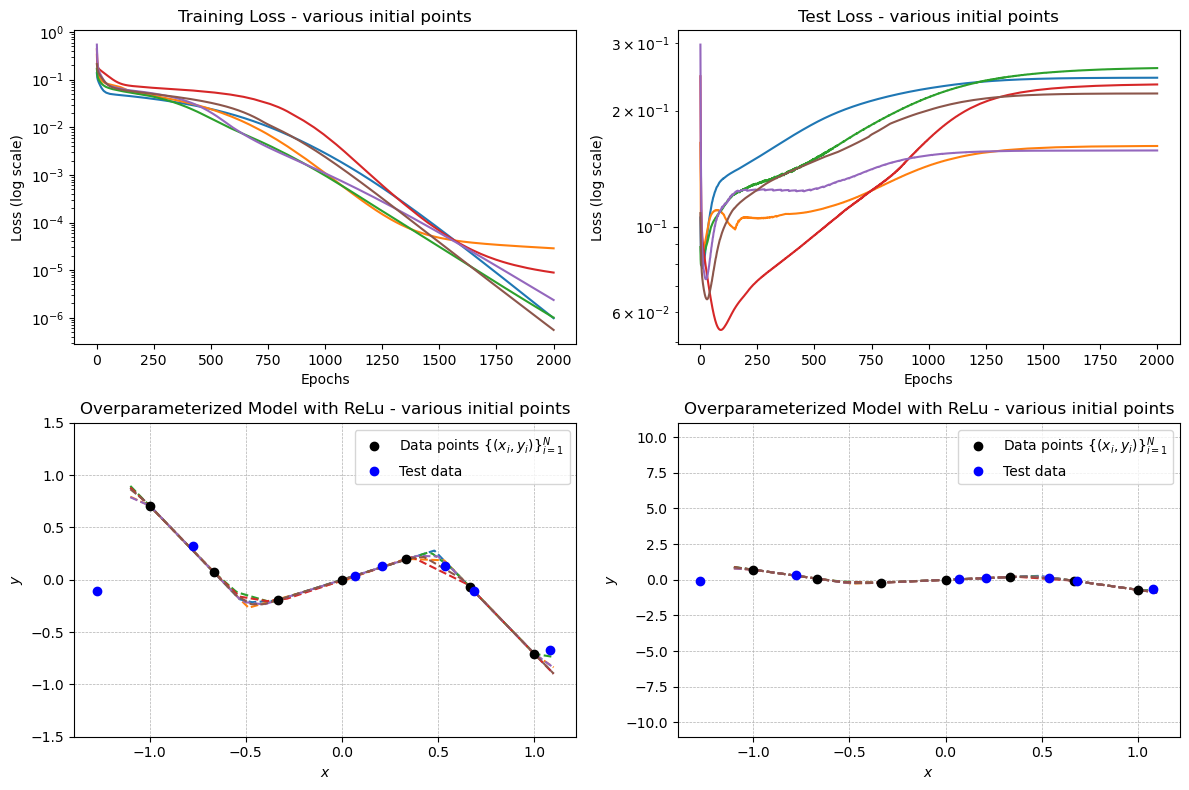

In [161]:
# Hint: The code below prints the parameters of the network 'model'
  #for name, param in model.named_parameters():
    #    if param.requires_grad:
    #        print(name, param.data)

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import optim

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Training data
N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's
torch_xs = torch.tensor(xs.reshape((N,1)), dtype=torch.float32)
torch_ys = torch.tensor(ys.reshape((N,1)), dtype=torch.float32)
dataset = TensorDataset(torch_xs, torch_ys)
data_loader = DataLoader(dataset, batch_size=len(xs)) # other batch sizes are of course allowed

# Test Data - Gauissian noises 
xs_test = xs + np.random.normal(0, 0.3, N)
N_test = len(xs_test)
ys_test = np.sin(5*xs_test)*np.exp(np.abs(2*xs_test)) / 10 # the y_i's
torch_xs_test = torch.tensor(xs_test.reshape((N_test,1)), dtype=torch.float32)
torch_ys_test = torch.tensor(ys_test.reshape((N_test,1)), dtype=torch.float32)
dataset_test = TensorDataset(torch_xs_test, torch_ys_test)
data_loader_test = DataLoader(dataset_test, batch_size=len(xs_test)) #No minibatches on test data 

# Define overparameterized model with ReLu
class model_over_relu(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=10)
        self.linear3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)
        return x
    

# Create an instance of each model with random starting points.
model_1 = model_over_relu()
model_2 = model_over_relu()
model_3 = model_over_relu()
model_4 = model_over_relu()
model_5 = model_over_relu()
model_6 = model_over_relu()

models = [model_1,model_2,model_3,model_4,model_5,model_6]

# Fetch the loss function
loss_fn = nn.MSELoss()

lr = 0.05
print(f'\nLEARNING RATE: {lr}')

# Prepare for plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
x_narrow = np.linspace(-1.1,1.1, num=1000)
x_wide = np.linspace(-11, 11, num=1000)

for model in models:
    
    # Fetch SGD optimizers
    optimizer = optim.SGD(model.parameters(), lr)

    # Train model_over_relu for 2000 epochs
    print('\nSGD training of the overparameterized model with relu:')
    losses = []
    testlosses = []
    for epoch in range(2000):
        for batch in data_loader:

            # 1. These are the sampled batches of inputs and ground-truth
            batch_x, batch_y = batch

            # 2. Compute the model's prediction on the batch
            pred = model(batch_x)

            # 3. Compute the loss of the prediction w.r.t. ground-truth
            loss = loss_fn(pred, batch_y)

            # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
            losses.append(loss)

            # 4. Backpropagation
            loss.backward()

            # 5. One step of SGD
            optimizer.step()

            # Zero the gradients computed in the backpropagation, for starting new optimization step
            optimizer.zero_grad()

        # Calculate and append test loss for each entry of the test dataset
        for test_data in data_loader_test: # Test_data contains all testdatapoints
            test_x, test_y = test_data
            test_pred = model(test_x)
            test_loss = loss_fn(test_pred, test_y)
            testlosses.append(test_loss)

        # Every 100th epoch, display progress
        if epoch % 500 == 0:
            print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses)/len(losses)))

    # Plot losses
    epochs = range(1, len(losses) + 1)
    axs[0][0].semilogy(epochs, [loss.item() for loss in losses])
    axs[0][1].semilogy(epochs, [test_loss.item() for test_loss in testlosses])
    
    #plot model
    with torch.no_grad():
        torch_x_narrow = torch.tensor(x_narrow.reshape((1000, 1)), dtype=torch.float32)
        torch_x_wide = torch.tensor(x_wide.reshape((1000, 1)), dtype=torch.float32)
        y_pred_narrow = model(torch_x_narrow).numpy()
        y_pred_wide = model(torch_x_wide).numpy()

    axs[1][0].plot(x_narrow, y_pred_narrow, '--')
    axs[1][1].plot(x_narrow, y_pred_narrow, '--')

#Finalize plots
axs[0][0].set_xlabel('Epochs')
axs[0][0].set_ylabel('Loss (log scale)')
axs[0][0].set_title(f'Training Loss - various initial points')

axs[0][1].set_xlabel('Epochs')
axs[0][1].set_ylabel('Loss (log scale)')
axs[0][1].set_title(f'Test Loss - various initial points')

axs[1][0].plot(xs, ys, 'ko', label=r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$')
axs[1][0].plot(xs_test, ys_test, 'bo', label=r'Test data')
axs[1][0].legend()
axs[1][0].set_xlabel('$x$')
axs[1][0].set_ylabel('$y$')
axs[1][0].grid(linestyle='dashed', linewidth=0.5)
axs[1][0].set_ylim([-1.5, 1.5])
axs[1][0].set_title(f'Overparameterized Model with ReLu - various initial points')

axs[1][1].plot(xs, ys, 'ko', label=r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$')
axs[1][1].plot(xs_test, ys_test, 'bo', label=r'Test data')
axs[1][1].legend()
axs[1][1].set_xlabel('$x$')
axs[1][1].set_ylabel('$y$')
axs[1][1].grid(linestyle='dashed', linewidth=0.5)
axs[1][1].set_ylim([-11, 11])
axs[1][1].set_title(f'Overparameterized Model with ReLu - various initial points')

plt.tight_layout()
plt.show()

### __3c)__ Discussion

_Does the initial point affect the final trained network?_

Above, the same neural network are trained with the same training procedure for six different starting points $\theta$. The network is overaparameterized with the same design as previously (two hidden layers, each dense with width 10, a total of 141 paramters). ReLu is used as hidden activation function, and 0.05 is kept as the learning rate as that was the learning rate which gave the most stable convergence characteristic of in both training and test in 3b.

Yes, the choice of inital point does affect the final trained network substantially. In the non-convex and overparameterized case, there are an unlimited number of soluitons and we can never be sure that we've found anything else than a local one. There is evidence in theory that suggests that SGD will converge to an optimum nearby the inital guess (if converging at all), so the inital guess does influence the otpimum found. In the plots, some networks converge towards zero training loss in 2000 epochs, while one network is stuck in an optimum with a loss of $10^{-1}$ and another is still oscilating after 2000 epochs. However, the specific results were lost as no seed was used in the stochastic initialization of starting points, but the discussion still holds.

The test losses provide more context. In one realization, the model which found the least optimal solution in training actually exhibited the best generalization performance! This highlights that a low training loss need not be a good model due to overtraining. This specific result was also lost as no seed was used.

__d)__ Fourth, we consider different training algorithms.

Compare
- SGD, and
- Adam (`optimizer = optim.Adam(model.parameters(), lr=0.1)`)

for an overparameterized network with ReLU activation functions at each layer and fixed widths and depth.

You are free to experiment with the learning rates and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

_Fill in your solution here!_


SGD training, ReLu, 0.05 learning rate:
Epoch: 0	Loss: 0.26214417815208435
Epoch: 500	Loss: 0.05111049488186836
Epoch: 1000	Loss: 0.028688665479421616
Epoch: 1500	Loss: 0.01919587515294552

SGD training, ReLu, 0.05 learning rate:
Epoch: 0	Loss: 0.1795259565114975
Epoch: 500	Loss: 0.07231014221906662
Epoch: 1000	Loss: 0.055198244750499725
Epoch: 1500	Loss: 0.04084768891334534

SGD training, ReLu, 0.05 learning rate:
Epoch: 0	Loss: 0.23328013718128204
Epoch: 500	Loss: 0.08233192563056946
Epoch: 1000	Loss: 0.05439429730176926
Epoch: 1500	Loss: 0.03733610361814499

SGD training, ReLu, 0.05 learning rate:
Epoch: 0	Loss: 0.25231319665908813
Epoch: 500	Loss: 0.051376547664403915
Epoch: 1000	Loss: 0.0315021350979805
Epoch: 1500	Loss: 0.02109694853425026

SGD training, ReLu, 0.05 learning rate:
Epoch: 0	Loss: 0.16042353212833405
Epoch: 500	Loss: 0.06487821042537689
Epoch: 1000	Loss: 0.053540125489234924
Epoch: 1500	Loss: 0.03952261060476303

SGD training, ReLu, 0.05 learning rate:
Epoch: 0	Los

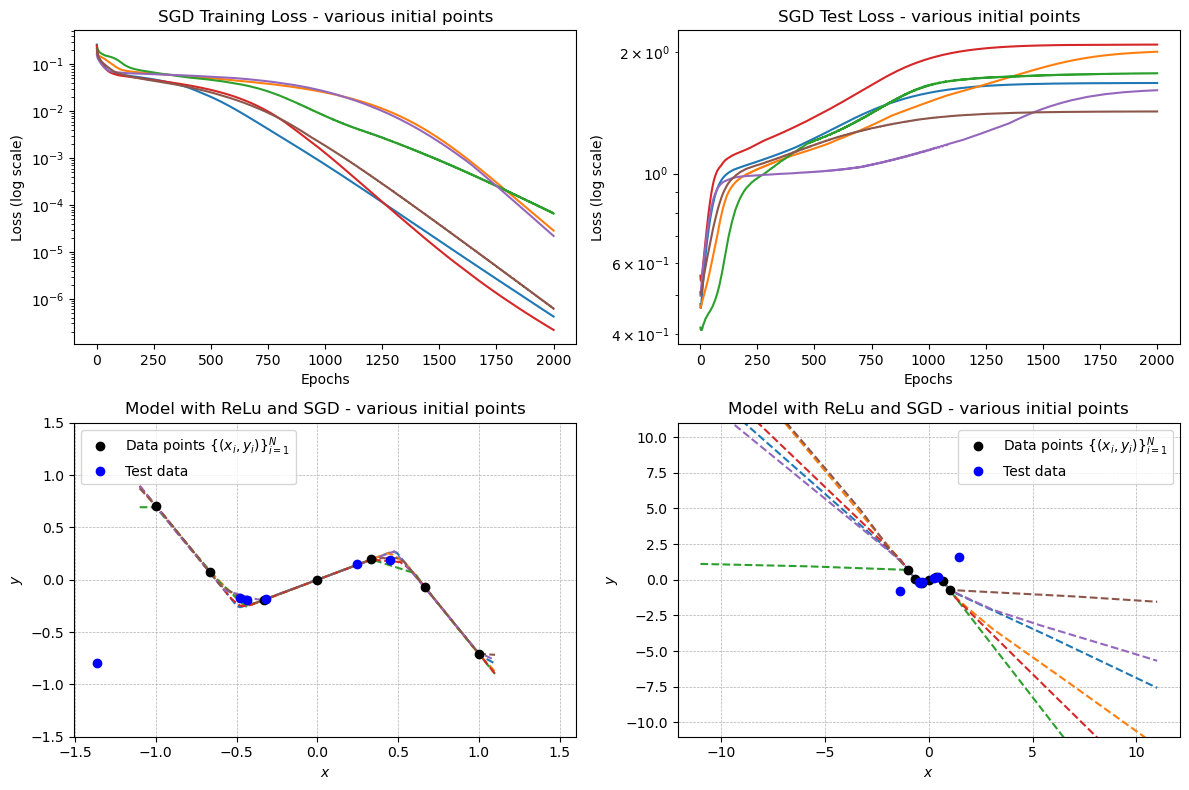


Adam training, ReLu, 0.1 learning rate:
Epoch: 0	Loss: 4.1681565221551864e-07
Epoch: 500	Loss: 0.01113181933760643
Epoch: 1000	Loss: 0.005571470130234957
Stopped training at: Epoch: 1253	Loss: 0.004447401501238346

Adam training, ReLu, 0.1 learning rate:
Epoch: 0	Loss: 2.8231415853952058e-05
Stopped training at: Epoch: 301	Loss: 0.013878908939659595

Adam training, ReLu, 0.1 learning rate:
Epoch: 0	Loss: 6.612834113184363e-05
Stopped training at: Epoch: 261	Loss: 0.009225372225046158

Adam training, ReLu, 0.1 learning rate:
Epoch: 0	Loss: 2.167674608699599e-07
Stopped training at: Epoch: 489	Loss: 0.005472599063068628

Adam training, ReLu, 0.1 learning rate:
Epoch: 0	Loss: 2.1758289221907035e-05
Epoch: 500	Loss: 0.019222084432840347
Epoch: 1000	Loss: 0.015265042893588543
Epoch: 1500	Loss: 0.013943994417786598

Adam training, ReLu, 0.1 learning rate:
Epoch: 0	Loss: 6.186657515172556e-07
Stopped training at: Epoch: 394	Loss: 0.020554108545184135


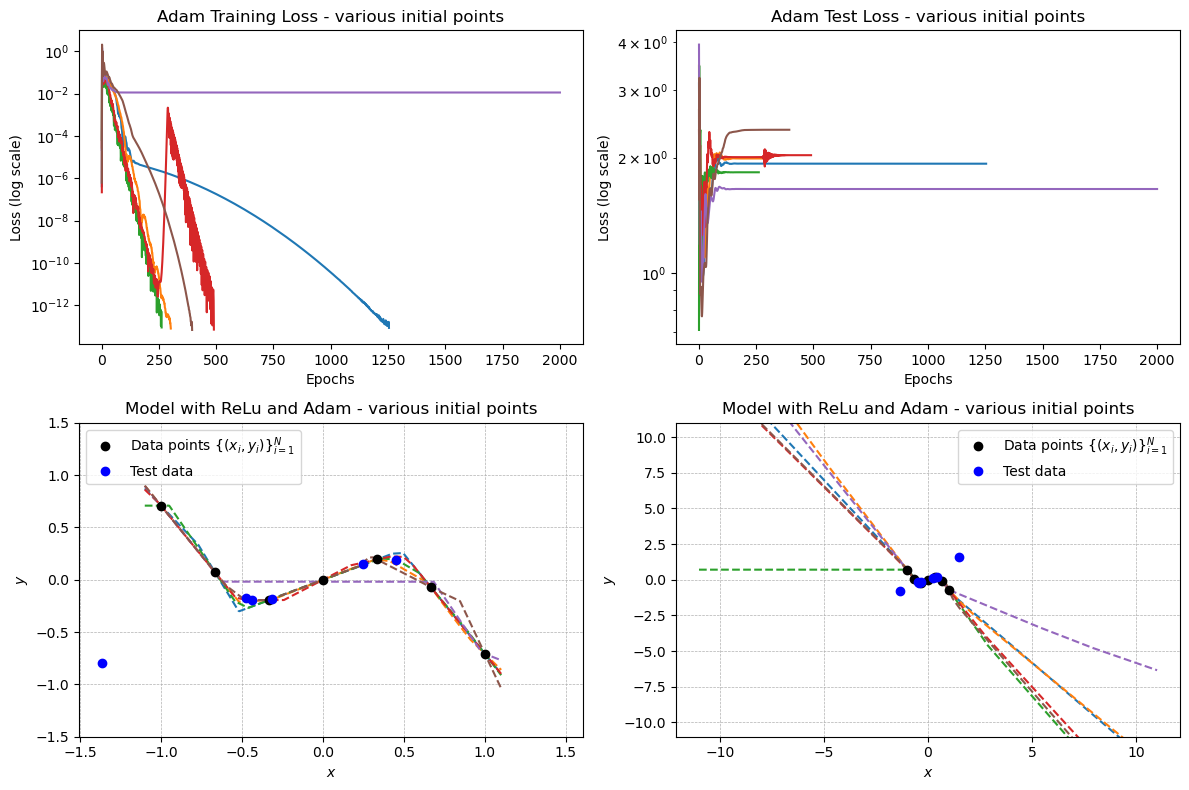

In [162]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import optim

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Training data
N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's
torch_xs = torch.tensor(xs.reshape((N,1)), dtype=torch.float32)
torch_ys = torch.tensor(ys.reshape((N,1)), dtype=torch.float32)
dataset = TensorDataset(torch_xs, torch_ys)
data_loader = DataLoader(dataset, batch_size=len(xs)) # other batch sizes are of course allowed

# Test Data - Gauissian noises 
xs_test = xs + np.random.normal(0, 0.3, N)
N_test = len(xs_test)
ys_test = np.sin(5*xs_test)*np.exp(np.abs(2*xs_test)) / 10 # the y_i's
torch_xs_test = torch.tensor(xs_test.reshape((N_test,1)), dtype=torch.float32)
torch_ys_test = torch.tensor(ys_test.reshape((N_test,1)), dtype=torch.float32)
dataset_test = TensorDataset(torch_xs_test, torch_ys_test)
data_loader_test = DataLoader(dataset_test, batch_size=len(xs_test)) #No minibatches on test data 

# Define overparameterized model with ReLu
class model_over_relu(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=10)
        self.linear3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)
        return x
    

# Create an instance of each model with random starting points.
model_1 = model_over_relu()
model_2 = model_over_relu()
model_3 = model_over_relu()
model_4 = model_over_relu()
model_5 = model_over_relu()
model_6 = model_over_relu()

models = [model_1,model_2,model_3,model_4,model_5,model_6]

# Fetch the loss function
loss_fn = nn.MSELoss()
    
for optname in ['SGD', 'Adam']:
    # Prepare for plotting
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    x_narrow = np.linspace(-1.1,1.1, num=1000)
    x_wide = np.linspace(-11, 11, num=1000)
    for model in models:
        # Fetch optimizers
        if optname == 'SGD':
            lr = 0.05
            optimizer = optim.SGD(model.parameters(), lr)
        else:
            lr = 0.1
            optimizer = optim.Adam(model.parameters(), lr)

        # Train for 2000 epochs
        print(f'\n{optname} training, ReLu, {lr} learning rate:')
        losses = []
        testlosses = []
        for epoch in range(2000):
            for batch in data_loader:
                
                # 1. These are the sampled batches of inputs and ground-truth
                batch_x, batch_y = batch

                # 2. Compute the model's prediction on the batch
                pred = model(batch_x)

                # 3. Compute the loss of the prediction w.r.t. ground-truth
                loss = loss_fn(pred, batch_y)

                # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
                losses.append(loss)

                # 4. Backpropagation
                loss.backward()

                # 5. One step of SGD
                optimizer.step()

                # Zero the gradients computed in the backpropagation, for starting new optimization step
                optimizer.zero_grad()

            # Calculate and append test loss for each entry of the test dataset
            for test_data in data_loader_test: # Test_data contains all testdatapoints
                test_x, test_y = test_data
                test_pred = model(test_x)
                test_loss = loss_fn(test_pred, test_y)
                testlosses.append(test_loss)
        
            if losses[-1] < 10e-14:
                print('Stopped training at: Epoch: {}\tLoss: {}'.format(epoch, sum(losses)/len(losses)))
                break

            # Every 500th epoch, display progress
            if epoch % 500 == 0:
                print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses)/len(losses)))

        # Plot losses
        epochs = range(1, len(losses) + 1)
        axs[0][0].semilogy(epochs, [loss.item() for loss in losses])
        axs[0][1].semilogy(epochs, [test_loss.item() for test_loss in testlosses])

        #plot model
        with torch.no_grad():
            torch_x_narrow = torch.tensor(x_narrow.reshape((1000, 1)), dtype=torch.float32)
            torch_x_wide = torch.tensor(x_wide.reshape((1000, 1)), dtype=torch.float32)
            y_pred_narrow = model(torch_x_narrow).numpy()
            y_pred_wide = model(torch_x_wide).numpy()

        axs[1][0].plot(x_narrow, y_pred_narrow, '--')
        axs[1][1].plot(x_wide, y_pred_wide, '--')

    #Finalize plots
    axs[0][0].set_xlabel('Epochs')
    axs[0][0].set_ylabel('Loss (log scale)')
    axs[0][0].set_title(f'{optname} Training Loss - various initial points')

    axs[0][1].set_xlabel('Epochs')
    axs[0][1].set_ylabel('Loss (log scale)')
    axs[0][1].set_title(f'{optname} Test Loss - various initial points')

    axs[1][0].plot(xs, ys, 'ko', label=r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$')
    axs[1][0].plot(xs_test, ys_test, 'bo', label=r'Test data')
    axs[1][0].legend()
    axs[1][0].set_xlabel('$x$')
    axs[1][0].set_ylabel('$y$')
    axs[1][0].grid(linestyle='dashed', linewidth=0.5)
    axs[1][0].set_ylim([-1.5, 1.5])
    axs[1][0].set_title(f'Model with ReLu and {optname} - various initial points')

    axs[1][1].plot(xs, ys, 'ko', label=r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$')
    axs[1][1].plot(xs_test, ys_test, 'bo', label=r'Test data')
    axs[1][1].legend()
    axs[1][1].set_xlabel('$x$')
    axs[1][1].set_ylabel('$y$')
    axs[1][1].grid(linestyle='dashed', linewidth=0.5)
    axs[1][1].set_ylim([-11, 11])
    axs[1][1].set_title(f'Model with ReLu and {optname} - various initial points')

    plt.tight_layout()
    plt.show()

### 3d) Discussion - SGD vs Adam
Above, a model is trained with either SGD (learning rate 0.05) or Adam (learning rate 0.1). In any case, four random inital points are used to train for otherwise identical neural networks: 141 parameters (thus overparmeterized), dense with ReLu activation functions. The intial points are shared in the experiments. The training algorithm is allowed to progress for a maximum of 2000 epochs.

The Adam optimization algorithm converges substantially faster than SGD. If allowed to run for 2000 epochs, Adam would find and then escape half a dozen minimums before terminating. Therefore a termination condition was added: stop training if training loss is less than $10e^-14$. With this condition, the Adam optimization finds solutions within the tolerance in a few hundered epochs, while SGD in general can't reach a smaller training loss than $10e^-6.

Adam is much faster than SGD. However, theory suggests that SGD can find better minimus, i.e. solutions that generalize better. Adam tends to find sharp minimums, while SGD escapes them to find flatter minimums. Adam also runs a larger risk of getting stuck in local minimums. Above, the purple network with ADam is stuck at a local minimum and the resulting model is just a horizontal line from $x \in [-0.6, 0.6]$. The orange model with Adam gets stuck after 250 epochs, escpaes at 1200 epochs, gets stuck again, escapes again, and then finaly converges after 1750 epochs. SGD training has no issues with purple or orange, but again with much slower progress in general. Again, these results dissapered when the code was re-run to fix a minor discovered error, from now on we will use seeded randomization. The results still hold.

__e)__ Fifth, we study the loss landscape of a trained network along different directions in parameter space.  


Train an overparameterized network with ReLU activation functions at each layer. Denote it by $m(\cdot,\theta^{*})$ where $\theta^{*}$ are the learned parameters. Sample $\Delta$, with the same size as $\theta^{*}$, from a standard normal distribution (and keep it fixed). Plot 

$$
\begin{align*}
    \frac{1}{N}\sum_{i=1}^N L\left(m\left(x_i;\theta^{*} + t \Delta\right),y_i\right)
\end{align*}
$$

as a function of $t\in[-1,1]$ (or even a larger interval). 

Do the same for another network with the same widths and depth, but using 4 * sigmoid activation functions at each layer. 

How does these two cases differ? Give a qualitative analysis. 

_Hints:_ You can get the parameters as a dictionary of a model by using `model.state_dict()`, updating the parameters in the dictionary, and then loading the updated parameters into the model using `model.load_state_dict(...)`. If you use this approach it is helpful to know the difference between [a shallow copy and a deep copy of a dictionary](https://thispointer.com/python-how-to-copy-a-dictionary-shallow-copy-vs-deep-copy/) You might need to cut off values of the loss that are too high to get a nice plot.

_Optional:_ Plot in two direction at the same time, i.e. plot 
$$
\begin{align*}
    \frac{1}{N}\sum_{i=1}^N L\left(m\left(x_i;\theta^{*} + t \Delta_{t} + s \Delta_{s}\right),y_i\right)
\end{align*}
$$

as a function of $t,s\in[-1,1]$. 

__Solution:__ 

_Fill in your solution here!_


ReLu, SGD training, 0.05 learning rate:
Epoch: 0	Loss: 0.17018873989582062
Epoch: 500	Loss: 0.06601393967866898
Epoch: 1000	Loss: 0.0426185242831707
Epoch: 1500	Loss: 0.02921168878674507

4*Sigmod, SGD training, 0.05 learning rate:
Epoch: 0	Loss: 2.268795967102051
Epoch: 500	Loss: 0.12374766916036606
Epoch: 1000	Loss: 0.09297289699316025
Epoch: 1500	Loss: 0.07879604399204254


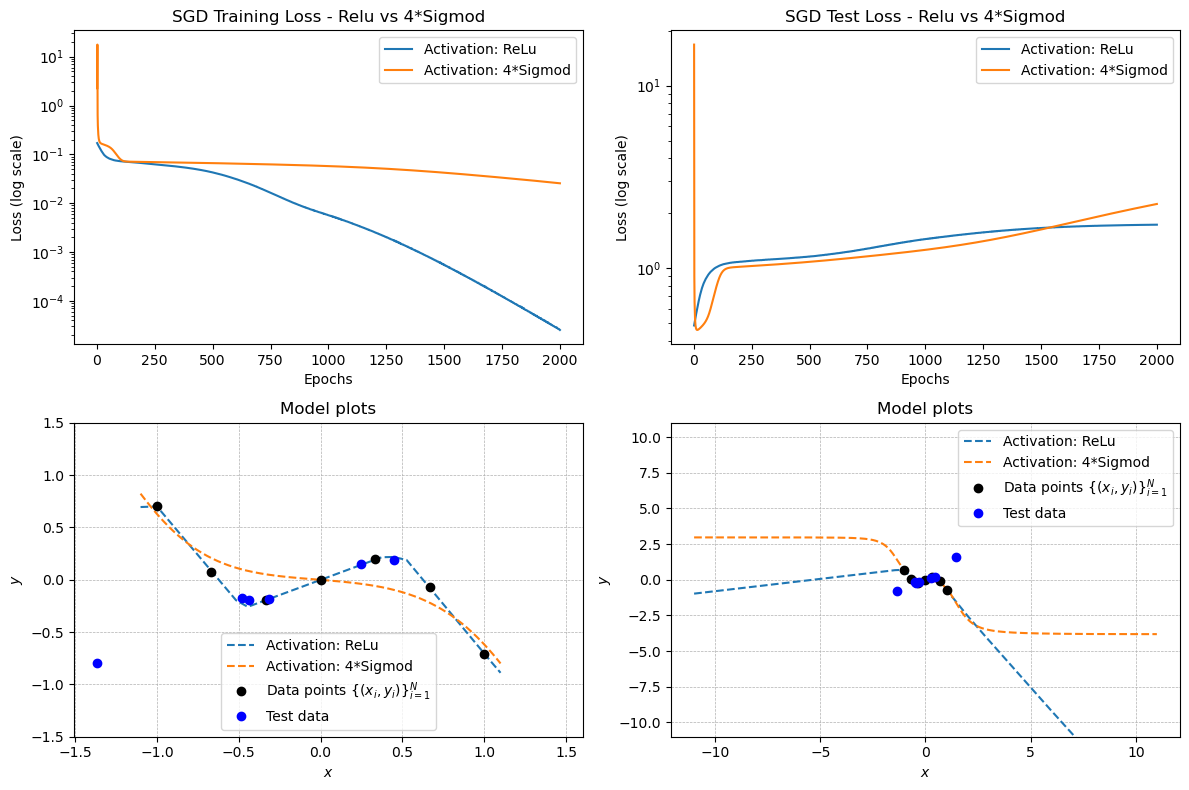

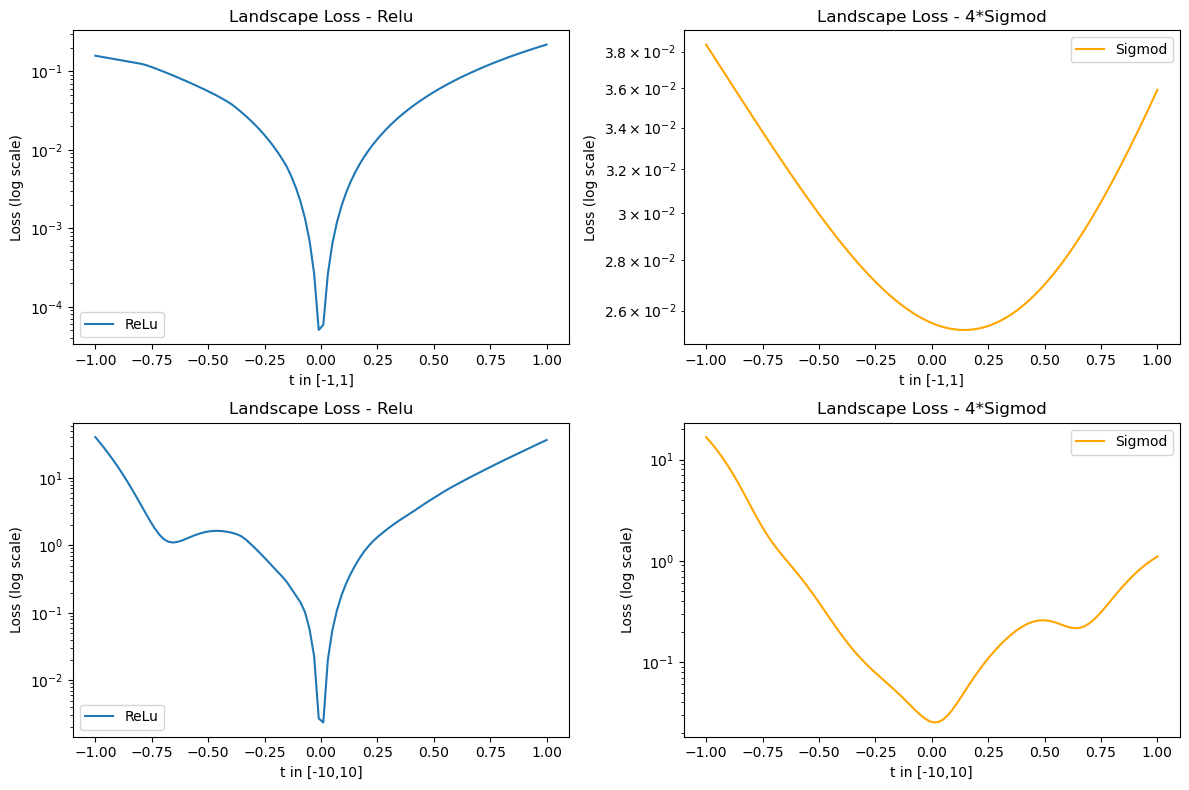

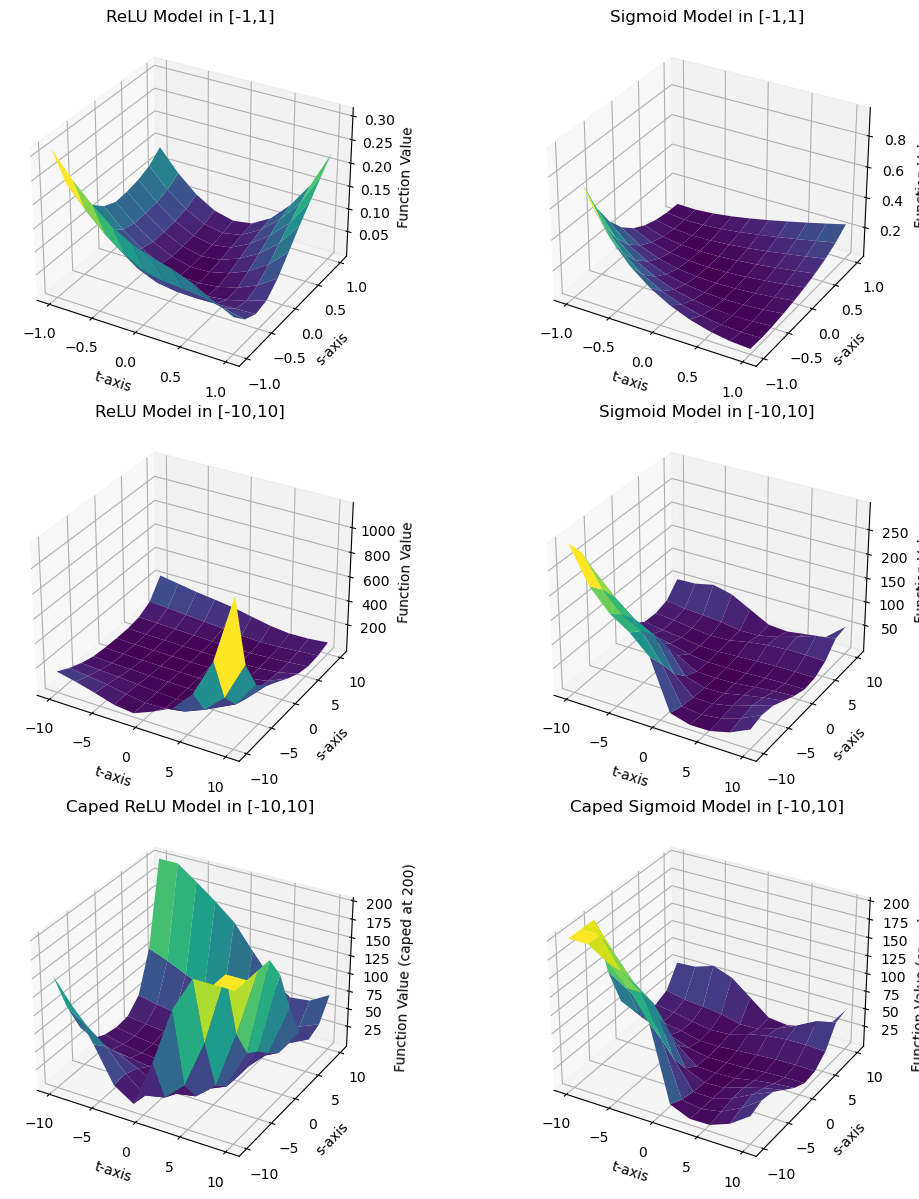

In [163]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import optim

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import copy

# Training data
N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's
torch_xs = torch.tensor(xs.reshape((N,1)), dtype=torch.float32)
torch_ys = torch.tensor(ys.reshape((N,1)), dtype=torch.float32)
dataset = TensorDataset(torch_xs, torch_ys)
data_loader = DataLoader(dataset, batch_size=len(xs)) # other batch sizes are of course allowed

# Define overparameterized model with ReLu
class model_relu(nn.Module):
    def __init__(self,seed=None):
        super().__init__()
        
        if seed is not None:
            torch.manual_seed(seed)
        
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=10)
        self.linear3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)
        return x

# Define overparameterized model with 4 * Sigmod
class model_sigmod(nn.Module):
    def __init__(self,seed=None):
        super().__init__()
        
        if seed is not None:
            torch.manual_seed(seed)
        
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=10)
        self.linear3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = 4*F.sigmoid(x)
        x = self.linear2(x)
        x = 4*F.sigmoid(x)
        x = self.linear3(x)
        return x

# Create an instance of each model with seeded starting points.
model_relu = model_relu(seed=42)
model_sigmod = model_sigmod(seed=42)
models = [[model_relu, 'ReLu'],[model_sigmod, '4*Sigmod']]

# Fetch the loss function
loss_fn = nn.MSELoss()
    
#Only use SGD for more consistent results
optname = 'SGD'

# Prepare for plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
x_narrow = np.linspace(-1.1,1.1, num=1000)
x_wide = np.linspace(-11, 11, num=1000)

# Train and plot models!
for model, actfunc in models:
    # Fetch optimizers
    if optname == 'SGD':
        lr = 0.05
        optimizer = optim.SGD(model.parameters(), lr)
    else:
        lr = 0.1
        optimizer = optim.Adam(model.parameters(), lr)

    # Train model for 2000 epochs
    print(f'\n{actfunc}, {optname} training, {lr} learning rate:')
    losses = []
    testlosses = []
    for epoch in range(2000):
        for batch in data_loader:

            # 1. These are the sampled batches of inputs and ground-truth
            batch_x, batch_y = batch

            # 2. Compute the model's prediction on the batch
            pred = model(batch_x)

            # 3. Compute the loss of the prediction w.r.t. ground-truth
            loss = loss_fn(pred, batch_y)

            # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
            losses.append(loss)

            # 4. Backpropagation
            loss.backward()

            # 5. One step of SGD
            optimizer.step()

            # Zero the gradients computed in the backpropagation, for starting new optimization step
            optimizer.zero_grad()

        # Calculate and append test loss for each entry of the test dataset
        for test_data in data_loader_test: # Test_data contains all testdatapoints
            test_x, test_y = test_data
            test_pred = model(test_x)
            test_loss = loss_fn(test_pred, test_y)
            testlosses.append(test_loss)

        if losses[-1] < 10e-14:
            print('Stopped training at: Epoch: {}\tLoss: {}'.format(epoch, sum(losses)/len(losses)))
            break

        # Every 500th epoch, display progress
        if epoch % 500 == 0:
            print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses)/len(losses)))

    # Plot losses
    epochs = range(1, len(losses) + 1)
    axs[0][0].semilogy(epochs, [loss.item() for loss in losses], label=f'Activation: {actfunc}')
    axs[0][1].semilogy(epochs, [test_loss.item() for test_loss in testlosses], label=f'Activation: {actfunc}')

    #plot model
    with torch.no_grad():
        torch_x_narrow = torch.tensor(x_narrow.reshape((1000, 1)), dtype=torch.float32)
        torch_x_wide = torch.tensor(x_wide.reshape((1000, 1)), dtype=torch.float32)
        y_pred_narrow = model(torch_x_narrow).numpy()
        y_pred_wide = model(torch_x_wide).numpy()

    axs[1][0].plot(x_narrow, y_pred_narrow, '--', label=f'Activation: {actfunc}')
    axs[1][1].plot(x_wide, y_pred_wide, '--', label=f'Activation: {actfunc}')

# Finalize plots
axs[0][0].set_xlabel('Epochs')
axs[0][0].set_ylabel('Loss (log scale)')
axs[0][0].set_title(f'{optname} Training Loss - Relu vs 4*Sigmod')
axs[0][0].legend()

axs[0][1].set_xlabel('Epochs')
axs[0][1].set_ylabel('Loss (log scale)')
axs[0][1].set_title(f'{optname} Test Loss - Relu vs 4*Sigmod')
axs[0][1].legend()

axs[1][0].plot(xs, ys, 'ko', label=r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$')
axs[1][0].plot(xs_test, ys_test, 'bo', label=r'Test data')
axs[1][0].legend()
axs[1][0].set_xlabel('$x$')
axs[1][0].set_ylabel('$y$')
axs[1][0].grid(linestyle='dashed', linewidth=0.5)
axs[1][0].set_ylim([-1.5, 1.5])
axs[1][0].set_title(f'Model plots')

axs[1][1].plot(xs, ys, 'ko', label=r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$')
axs[1][1].plot(xs_test, ys_test, 'bo', label=r'Test data')
axs[1][1].legend()
axs[1][1].set_xlabel('$x$')
axs[1][1].set_ylabel('$y$')
axs[1][1].grid(linestyle='dashed', linewidth=0.5)
axs[1][1].set_ylim([-11, 11])
axs[1][1].set_title(f'Model plots')

plt.tight_layout()
plt.show()

# MODELS BUILT AND VERIFIED. Now onto the loss landscape analysis.

# Funciton that adjusts a deepcopy of a model
def adjusted_model(model_deepcopy,t):
    np.random.seed(42)
    theta_deepcopy = copy.deepcopy(model_deepcopy.state_dict()) # Get the parameters
    for key, value in theta_deepcopy.items(): # For each layer
        tensor_size = theta_deepcopy[key].size()
        delta = np.random.normal(0,0.1, size=tensor_size) # sample delta
        delta_tensor = torch.tensor(delta)
        term = t * delta_tensor
        theta_deepcopy[key] = torch.add(theta_deepcopy[key], term) # add delta scaled by t
    model_deepcopy.load_state_dict(theta_deepcopy) # load new parameters
    return model_deepcopy

# Prepare for plotting
fig, axs = plt.subplots(2,2,figsize=(12,8))
models = [model_relu, 'ReLu'],[model_sigmod, 'Sigmod']

# Calculate and plot loss landscape in [-1, 1]
ts = np.linspace(-1,1,100)
for model, modelname in models:
    losses = []
    for t in ts:
        model_deepcopy = copy.deepcopy(model)
        adjusted_model_deepcopy = adjusted_model(model_deepcopy,t)
        with torch.no_grad():
            all_data = next(iter(data_loader))
            all_x, all_y = all_data
            all_preds = adjusted_model_deepcopy(all_x) # Use model to make prediction on all data
            loss = loss_fn(all_preds, all_y).item()  #Calculate loss, convert from tensor(float) to float
            losses.append(loss)
    if modelname == 'ReLu':
        axs[0][0].semilogy(ts, [loss for loss in losses], label=f'{modelname}')
    if modelname == 'Sigmod':
        axs[0][1].semilogy(ts, [loss for loss in losses], label=f'{modelname}', color = 'orange')

# Calculate loss landscape in [-10, 10]
ts_wide = np.linspace(-10,10,100)
models = [model_relu, 'ReLu'],[model_sigmod, 'Sigmod']
for model, modelname in models:
    losses = []
    for t in ts_wide:
        model_deepcopy = copy.deepcopy(model)
        adjusted_model_deepcopy = adjusted_model(model_deepcopy,t)
        with torch.no_grad(): 
            all_data = next(iter(data_loader))
            all_x, all_y = all_data
            all_preds = adjusted_model_deepcopy(all_x) # Use model to make prediction on all data
            loss = loss_fn(all_preds, all_y).item() #Calculate loss, convert from tensor(float) to float
            losses.append(loss)
    if modelname == 'ReLu':
        axs[1][0].semilogy(ts, [loss for loss in losses], label=f'{modelname}')
    if modelname == 'Sigmod':
        axs[1][1].semilogy(ts, [loss for loss in losses], label=f'{modelname}', color = 'orange')


# Finalize plots
axs[0][0].set_xlabel('t in [-1,1]')
axs[0][0].set_ylabel('Loss (log scale)')
axs[0][0].set_title('Landscape Loss - Relu')
axs[0][0].legend()

axs[0][1].set_xlabel('t in [-1,1]')
axs[0][1].set_ylabel('Loss (log scale)')
axs[0][1].set_title('Landscape Loss - 4*Sigmod')
axs[0][1].legend()

axs[1][0].set_xlabel('t in [-10,10]')
axs[1][0].set_ylabel('Loss (log scale)')
axs[1][0].set_title('Landscape Loss - Relu')
axs[1][0].legend()

axs[1][1].set_xlabel('t in [-10,10]')
axs[1][1].set_ylabel('Loss (log scale)')
axs[1][1].set_title('Landscape Loss - 4*Sigmod')
axs[1][1].legend()

plt.tight_layout()
plt.show()

# OPTIONAL ASSIGMENT: 3D plot

# Define a loss landscape function that takes in T, S = np.meshgrid()
def loss_landscape(T,S,model):
    losses = []
    for t_row, s_row in zip(T, S):
        for t, s in zip(t_row, s_row):
            model_deepcopy = copy.deepcopy(model)
            adjusted_model_deepcopy = adjusted_model_3D(model_deepcopy,t,s)
            with torch.no_grad():
                all_data = next(iter(data_loader))
                all_x, all_y = all_data
                all_preds = adjusted_model_deepcopy(all_x) # Use model to make prediction on all data
                loss = loss_fn(all_preds, all_y).item()  #Calculate loss, convert from tensor(float) to float
                losses.append(loss)
    return np.array(losses).reshape(len(t_row), len(s_row))

# Funciton that adjusts a deepcopy of a model
def adjusted_model_3D(model_deepcopy,t,s):
    theta_deepcopy = copy.deepcopy(model_deepcopy.state_dict()) # Get the parameters
    for key, value in theta_deepcopy.items(): # For each layer
        tensor_size = theta_deepcopy[key].size()
        np.random.seed(42)
        delta_t = np.random.normal(0,0.1, size=tensor_size) # sample delta
        delta_t_tensor = torch.tensor(delta_t)
        np.random.seed(44) #other deltas in s-direction
        delta_s = np.random.normal(0,0.1, size=tensor_size) # sample delta
        delta_s_tensor = torch.tensor(delta_s)
        term = t * delta_t_tensor + s * delta_s_tensor
        theta_deepcopy[key] = torch.add(theta_deepcopy[key], term) # add delta scaled by t
    model_deepcopy.load_state_dict(theta_deepcopy) # load new parameters
    return model_deepcopy

# Calculate and plot loss landscape in [-1, 1] and [-10,10]
ts = np.linspace(-1,1,10)
ss = np.linspace(-1,1,10)
ts_wide = np.linspace(-10,10,10)
ss_wide = np.linspace(-10,10,10)

T, S = np.meshgrid(ts, ss)
T_wide, S_wide = np.meshgrid(ts_wide, ss_wide)

Z_relu = loss_landscape(T,S,model_relu)
Z_sigmod = loss_landscape(T,S,model_sigmod)
Z_relu_wide = loss_landscape(T_wide,S_wide,model_relu)
Z_sigmod_wide = loss_landscape(T_wide,S_wide,model_sigmod)
Z_relu_wide_cut = np.where(Z_relu_wide > 200, 200, Z_relu_wide)
Z_sigmod_wide_cut = np.where(Z_sigmod_wide > 200, 200, Z_sigmod_wide)

fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(321, projection='3d') #3 rows, 2 cols, plot 1
ax2 = fig.add_subplot(322, projection='3d')
ax3 = fig.add_subplot(323, projection='3d')
ax4 = fig.add_subplot(324, projection='3d')
ax5 = fig.add_subplot(325, projection='3d')
ax6 = fig.add_subplot(326, projection='3d')

ax1.plot_surface(T, S, Z_relu, cmap='viridis')
ax2.plot_surface(T, S, Z_sigmod, cmap='viridis')
ax3.plot_surface(T_wide, S_wide, Z_relu_wide, cmap='viridis')
ax4.plot_surface(T_wide, S_wide, Z_sigmod_wide, cmap='viridis')
ax5.plot_surface(T_wide, S_wide, Z_relu_wide_cut, cmap='viridis')
ax6.plot_surface(T_wide, S_wide, Z_sigmod_wide_cut, cmap='viridis')

ax1.set_xlabel('t-axis')
ax1.set_ylabel('s-axis')
ax1.set_zlabel('Function Value')
ax1.set_title('ReLU Model in [-1,1]')
ax2.set_xlabel('t-axis')
ax2.set_ylabel('s-axis')
ax2.set_zlabel('Function Value')
ax2.set_title('Sigmoid Model in [-1,1]')
ax3.set_xlabel('t-axis')
ax3.set_ylabel('s-axis')
ax3.set_zlabel('Function Value')
ax3.set_title('ReLU Model in [-10,10]')
ax4.set_xlabel('t-axis')
ax4.set_ylabel('s-axis')
ax4.set_zlabel('Function Value')
ax4.set_title('Sigmoid Model in [-10,10]')
ax5.set_xlabel('t-axis')
ax5.set_ylabel('s-axis')
ax5.set_zlabel('Function Value (caped at 200)')
ax5.set_title('Caped ReLU Model in [-10,10]')
ax6.set_xlabel('t-axis')
ax6.set_ylabel('s-axis')
ax6.set_zlabel('Function Value (caped at 200)')
ax6.set_title('Caped Sigmoid Model in [-10,10]')

plt.tight_layout()
plt.show()


### 3e) Loss Landscape Discussion

Above is an extensive analysis of the loss landscapes around optimums. First two overparameterized models are trained using SGD with learing rate 0.05 and a detreministic initial point. The models differ only in that one uses ReLu as activation function and the other uses $4*$sigmoid. From previous discussion we know that the relu will learn faster due to the vanishing gradient problem.

The models are plotted both together with data and with respect to training loss. We observe, just as before, that Relu reaches better training performance.

With the models trained and confirmed, we plot the 2D loss landscape around the optimums of each model, both in the span $t\in[-1,1]$ and $t\in[-10,10]$. The Relu function has a much sharper minimum than the Sigmoid. $\Delta t = 1$ yields a loss difference of the magniture $10^3$ for the ReLu model, but not even a doubleing for the Sigmoid model.

When zooming out to $t \in [-10,10]$, the result is the same, albeit the Sigmoid model now also experience some substantial loss difference of $10^2$ with $\Delta t = 10$ compared to  $10^3$ for the ReLu model.

The analysis is repeated in 3D, with the added variable $s \in [-1,1]$ or $s \in [-10,10]$ respectively. $\Delta_s$ is now sampled from the same distribution (Gaussian with zero mean and 0.1 standard deviation) but with a different seed to avoid symetry. At this scale, we observe that the ReLu reaches a four times larger loss difference within the domain (1000 vs 250 on the z-axis). It is difficult to say anything about the rest of the landscape due to the different scales. We therefore replot the loss landscape with a cap of 200.

The caped plots again show that ReLu has found a minimum with a sharper loss landscape.

---
### Exercise 4: Implicit regularization via small norm in polynomial fitting in $\mathbb{R}$
_Remark:_ You should solve this exercise using `numpy` primarily.

The purpose of this exercise is to study optimization problems in the overparameterized regime, i.e., when there are multiple solutions to choose from, and see how the norm of a given solution may affect generalization.   

Again, we consider the data points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:

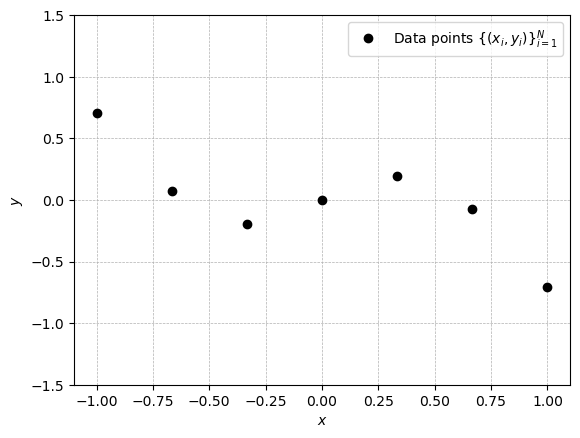

In [164]:
N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

We wish to fit a polynomial model $m(\cdot;\theta)$ of degree $n=9$ (overparameterized) to the data points  $\{(x_{i},y_{i})\}_{i=1}^{N}$. One solution $m(\cdot;\theta^{*})$ is given below:

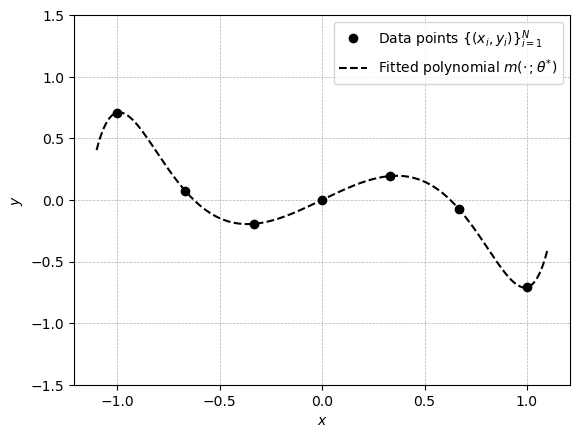

In [165]:
theta_star = np.array([0,  0.8, 0, -1.9, 0, -0.583957507, 0, 0.28, 0, 0.695322536])
x = np.linspace(-1.1, 1.1, num = 1000)

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.plot(x, np.polyval(np.flip(theta_star), x),'k--')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Fitted polynomial $m(\cdot\,;\theta^{*})$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

---

__a)__ Recall from __Exercise 1__ __g)__ that given a candidate point $a\in\mathbb{R}^{n+1}$, we can obtain a solution via the Euclidean projection formula $\theta^{*} = a - X^{T}(XX^{T})^{-1}(Xa-Y)$. Initialize $a$ randomly and compute the projection $\theta^{*}$ and plot the fitted polynomial $m(\cdot;\theta^{*})$ as above. Vary the magnitude or norm of $\theta^{*}$ indirectly by multiplying $a$ by $0$, $10$, $100$ and $1000$. Visually, how does the generalization of $m(\cdot;\theta^{*})$ correspond to the norm of $\theta^{*}$?

__Solution:__ 

_Fill in your solution here!_

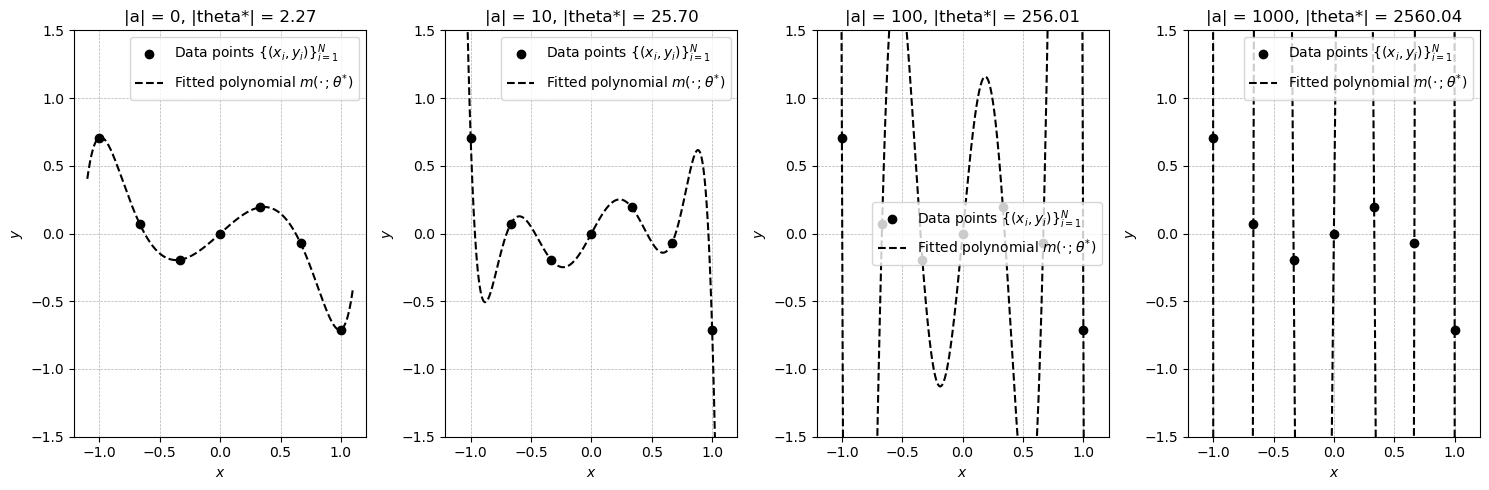

In [166]:
n = 9 # degree
a = np.random.randn(n + 1)

# Write your code here
def euclidean_projection(X, a, y):
    """Compute the Euclidean projection."""
    return a - X.T @ np.linalg.inv(X @ X.T) @ (X @ a - y)

def plot_fitted_polynomial(X, y, degree, a_values):
    x = np.linspace(-1.1, 1.1, num = 1000)
    fig, axes = plt.subplots(1, len(a_values), figsize=(15, 5), dpi=100)
    
    for idx, a_val in enumerate(a_values):
        a_scaled = a_val * a
        theta_star = euclidean_projection(X, a_scaled, y)
        
        ax = axes[idx]
        ax.plot(xs, ys, 'ko')
        ax.plot(x, np.polyval(np.flip(theta_star), x), 'k--')
        ax.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Fitted polynomial $m(\cdot\,;\theta^{*})$'])
        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        ax.grid(linestyle='dashed', linewidth=0.5)
        ax.set_ylim([-1.5, 1.5])
        ax.set_title(f"|a| = {a_val}, |theta*| = {np.linalg.norm(theta_star):.2f}")
        
    plt.tight_layout()
    plt.show()

# Use the polynomial_features function to transform xs for degree 9
X = polynomial_features(xs, 9)
a_values = [0, 10, 100, 1000]
plot_fitted_polynomial(X, ys, 9, a_values)




As the norm of $\theta^*$ increases, the fitted polynomial becomes more flexible. Initially, this leads to a better fit, but beyond a certain threshold, it results in overfitting. The polynomial starts to capture not just the underlying trend but also the noise, leading to crazy oscillations between data points.

__b)__ Implement the GD method for optimization problem (2) in __Exercise 1__ above, starting at $\theta_{0}=0$, using step size $\gamma_{k} = 1/\beta$, and verify that the resulting sequence $\{\theta_{k}\}_{k\geq0}$ converges to $\theta^{*}$, where $\theta^{*}$ is the Euclidean projection starting from the candidate point $a=0$. I.e., the GD method converges to the solution with the smallest norm. Do this by plotting $||\theta_{k}-\theta^{*}||_{2}^{2}$ as a function of $k$ in log-linear scale.

_Remark:_ We consider $\theta_{k}$ to have converged to $\theta^{*}$ if $||\theta_{k}-\theta^{*}||_{2}^{2} \leq 10^{-16}$.


__Solution:__ 

_Fill in your solution here!_

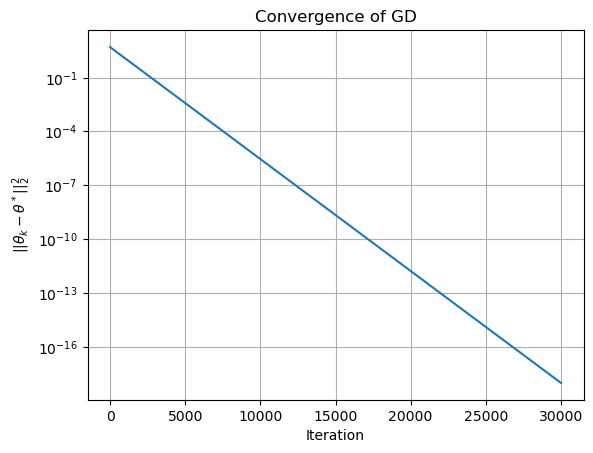

In [167]:
n = 9 
N = len(xs)

X = polynomial_features(xs, n)
beta = 2 * np.linalg.norm(X.T @ X) / N
gamma = 1 / beta
a = np.zeros(n+1)
theta_star = euclidean_projection(X, a, ys)
thetas_sequence = gradient_descent(X, ys, gamma, beta, 30000)

norms = [np.linalg.norm(theta_k - theta_star)**2 for theta_k in thetas_sequence]

# Plotting
plt.semilogy(norms)
plt.xlabel('Iteration')
plt.ylabel(r'$||\theta_k - \theta^*||_2^2$')
plt.title('Convergence of GD')
plt.grid(True)
plt.show()

From the graph we can see that it converges somewhere between 25 - 30 thousand iterations. 

---

__c)__ Implement the SGD method for optimization problem (1) in __Exercise 1__ above, starting at $\theta_{0}=0$, using step size $\gamma_{k} = 0.1 / \beta$, and verify that the resulting sequence $\{\theta_{k}\}_{k\geq0}$ converges to $\theta^{*}$, where $\theta^{*}$ is the Euclidean projection starting from the candidate point $a=0$. I.e., the SGD method converges to the solution with the smallest norm. Do this by plotting $||\theta_{k}-\theta^{*}||_{2}^{2}$ as a function of $k$ in log-linear scale.


__Solution:__ 


_Fill in your solution here!_

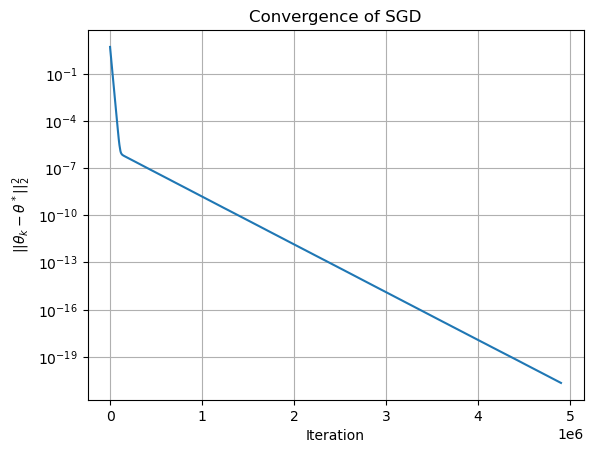

In [168]:
# Write your code here
gamma = 0.1 / beta
thetas_sequence = stochastic_gradient_descent(X,ys, gamma, beta, 700000*N, 1)

# Compute the norms post-hoc
theta_star = euclidean_projection(X, a, ys)
norms = [np.linalg.norm(theta_k - theta_star)**2 for theta_k in thetas_sequence]

# Plotting
plt.semilogy(norms)
plt.xlabel('Iteration')
plt.ylabel(r'$||\theta_k - \theta^*||_2^2$')
plt.title('Convergence of SGD')
plt.grid(True)
plt.show()

It converges! 

---

__d)__ The ADAM optimization method is given by:

- Pick $\theta_{0}\in\mathbb{R}^{n+1}$, $\hat{m}_{0}=\hat{v}_{0}=0\in\mathbb{R}^{n+1}$, $b_{m},b_{v}\in(0,1)$ and $\gamma,\epsilon>0$.
- For $k\geq 0$:
    - Pick $i\in\{1,\ldots, N\}$ uniformly at random
    - Set $g_{k+1} = \nabla f_{i}(\theta_{k})$
    - Set $\hat{m}_{k+1} = b_{m}\hat{m}_{k}+(1-b_{m})g_{k+1}$
    - Set $\hat{v}_{k+1} = b_{v}\hat{v}_{k}+(1-b_{v})g_{k+1}^{2}$ (element-wise square)
    - Set $m_{k+1}=\hat{m}_{k+1}/(1-b_{m}^{k+1})$
    - Set $v_{k+1}=\hat{v}_{k+1}/(1-b_{v}^{k+1})$
    - Set $\theta_{k+1} = \theta_{k} - \gamma m_{k+1} ./ (\sqrt{v_{k+1}} + \epsilon\mathbb{1})$ (element-wise division and square root)

Use the [suggested values](https://arxiv.org/pdf/1412.6980.pdf):

- $b_{m} = 0.9$
- $b_{v} = 0.999$
- $\gamma = 0.001$
- $\epsilon = 10^{-8}$

Implement the ADAM optimization method for optimization problem (1) in __Exercise 1__ above, starting at $\theta_{0}=0$. Does ADAM converge to the minimum norm solution? Plot the resulting model.

__Solution:__ 


_Fill in your solution here!_

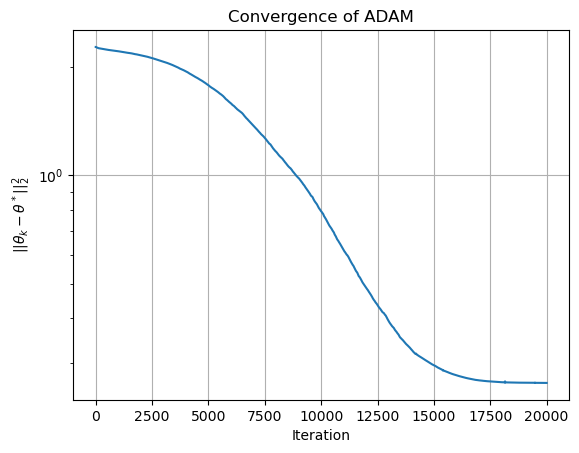

In [169]:
N = 7 
n = 9 
def adam_optimization(X, ys, theta0, bm=0.9, bv=0.999, gamma=0.001, epsilon=1e-8, epochs=20000):
    m_hat = np.zeros(n+1)
    v_hat = np.zeros(n+1)
    m = np.zeros(n+1)
    v = np.zeros(n+1)
    theta = theta0

    theta_values = [theta]

    for k in range(epochs):
        i = np.random.randint(0, N) 
        gk = stochastic_gradient(X, ys, theta, i)

        m_hat = bm * m_hat + (1 - bm)* gk
        v_hat = bv * v_hat + (1 - bv) * np.square(gk)
        m = m_hat / (1 - bm**(k + 1))
        v = v_hat / (1 - bv**(k + 1))

        theta = theta - gamma * m / (np.sqrt(v) + epsilon)
        theta_values.append(theta)

    return theta_values
X = polynomial_features(xs, n)
theta0 = np.zeros(n+1) # Initial value of theta
theta_values = adam_optimization(X, ys, theta0)

norms = [np.linalg.norm(theta_k - theta_star) for theta_k in theta_values]

# Plotting
plt.semilogy(norms)
plt.xlabel('Iteration')
plt.ylabel(r'$||\theta_k - \theta^*||_2^2$')
plt.title('Convergence of ADAM')
plt.grid(True)
plt.show()


The norm of the difference does not converge to the smallest norm solution. This can acutally be expected since Adam-method should not converge towards the minimium norm but instead it scales the coordinates which will result in another solution. 

---

__e)__ The ADAM optimization method scales the gradient independently in each coordinate. We call such methods diagonally scaled methods. 

Now, recall the scaled projection problem from __Exercise 1__ __g)__ above: given a candidate point $a\in\mathbb{R}^{n+1}$, we can obtain a solution via the scaled projection formula $\theta^{*} = a - H^{-1}X^{T}(X H^{-1} X^{T})^{-1}(Xa-Y)$.


Consider the candidate point $a\in\mathbb{R}^{n+1}$ and the highly skewed diagonal scaling matrix $H\in\mathbb{S}^{n+1}_{++}$ below:

In [170]:
a = np.zeros(n + 1)
H_inv = np.diag(np.logspace(-10, 10, num = n + 1)) # the inverse of H

Plot the data points $\{(x_{i},y_{i})\}_{i=1}^{N}$ and the fitted polynomial $m(\cdot;\theta^{*})$ in the same figure using the scaled projection formula. Visually, does the fitted polynomial $m(\cdot;\theta^{*})$ seem to generalize well?

__Solution:__ 

_Fill in your solution here!_

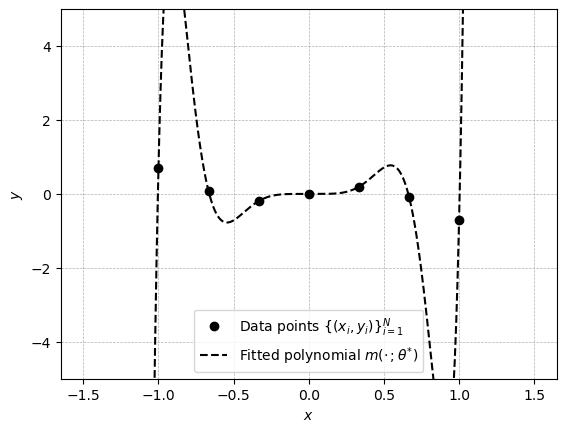

In [171]:
# Write your code here
# 1. Scaled Projection formula
def scaled_projection(a, X, Y, H_inv):
    """
    Compute theta* using the scaled projection formula.
    """
    inner_inv = np.linalg.inv(X @ H_inv @ X.T)
    theta_star = a - H_inv @ X.T @ inner_inv @ (X @ a - ys)
    return theta_star

X = polynomial_features(xs, n )
theta_star = scaled_projection(a, X, ys, H_inv)

x = np.linspace(-1.5, 1.5, num = 1000)
fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.plot(x, np.polyval(np.flip(theta_star), x),'k--')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Fitted polynomial $m(\cdot\,;\theta^{*})$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-5,5]);

plt.show()

The fit appears good for the given data points, but it's unclear how well it would generalize outside. The sharp ascent and descent at the ends of the graph indicate that predictions for values of x beyond the range might not generalize well. 

---

__f)__ The scaled GD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$ and $H\in\mathbb{S}_{+}^{n+1}$
- For $k\geq 0$:
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} H^{-1}\nabla f(\theta_{k})$ for some $\gamma_{k}>0$.

For numerical reasons (i.e., so that the algorithm converges in reasonable time), consider the less skewed diagonal scaling matrix below:

In [172]:
H_inv = np.diag(np.logspace(-3, 0, num = n + 1)) # the inverse of H

Starting at $\theta_{0}=0$ and using the step size $\gamma_{k}=1/\beta_{H}$, show that the scaled GD method converges to the scaled projection point $\theta^{*}=a - H^{-1}X^{T}(X H^{-1} X^{T})^{-1}(Xa-Y)$ for $a=0$.

Here, $\beta_{H}$ is given by

\begin{align}
    \beta_{H} = \frac{2}{N}\left\lVert H^{-\frac{1}{2}}X^{T}X H^{-\frac{1}{2}} \right\rVert_{2},
\end{align}

where $H^{-\frac{1}{2}}$ is the symmetric square root of $H^{-1}$.

__Solution:__ 

_Fill in your solution here!_

7
0.8040760244151196
1.2436634965299387


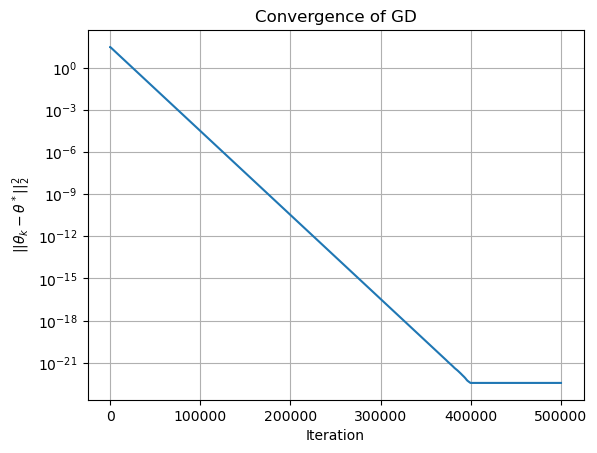

In [173]:
# Write your code here
def compute_beta_H(X, H_inv):
    # Symmetric square root of H_inv
    H_inv_half = np.sqrt(H_inv)

    # Compute product
    product_matrix = H_inv_half @ X.T @ X @ H_inv_half

    # Compute beta_H
    
    beta_H = 2/N * np.linalg.norm(product_matrix)
    print(N)
    print(beta_H)
    return beta_H

def scaled_gradient_descent(X, y, gamma, beta, iterations=10000):
    theta = np.zeros(X.shape[1])
    thetas = []
    for _ in range(iterations):
        grad = gradient(X, y, theta)
        theta = theta - gamma * H_inv @ grad
        thetas.append(theta)
    return np.array(thetas)

N = 7
n = 9
X = polynomial_features(xs, n)
beta_h = compute_beta_H(X, H_inv)
gamma = 1 / beta_h
print(gamma)
a = np.zeros(n+1)
theta_star = scaled_projection(a, X, ys, H_inv)
thetas_sequence = scaled_gradient_descent(X, ys, gamma, beta_h, 500000)

norms = [np.linalg.norm(theta_k - theta_star)**2 for theta_k in thetas_sequence]

# Plotting
plt.semilogy(norms)
plt.xlabel('Iteration')
plt.ylabel(r'$||\theta_k - \theta^*||_2^2$')
plt.title('Convergence of GD')
plt.grid(True)
plt.show()

It converges!

---
### Exercise 5: Implicit regularization via flatness
_Remark:_ You should solve this exercise using `numpy` primarily.

It has been observed in the [literature](https://arxiv.org/pdf/1609.04836.pdf) that flat mimima tend to lead to better generalization than sharp minima. In this exercise, we empirically verfiy that SGD tends to favour flat mimima.

Consider the finite-sum problem problem
$$
\begin{equation}
\begin{aligned}
& \underset{x\in\mathbb{R}}{\mathrm{minimize}}
& & f(x)= \frac{1}{N} \sum_{i=1}^{N}f_{i}(x)
\end{aligned}
\end{equation}
$$
where the $f_{i}$'s and $f$ are given below: (the derivatives are also given for convenience.)

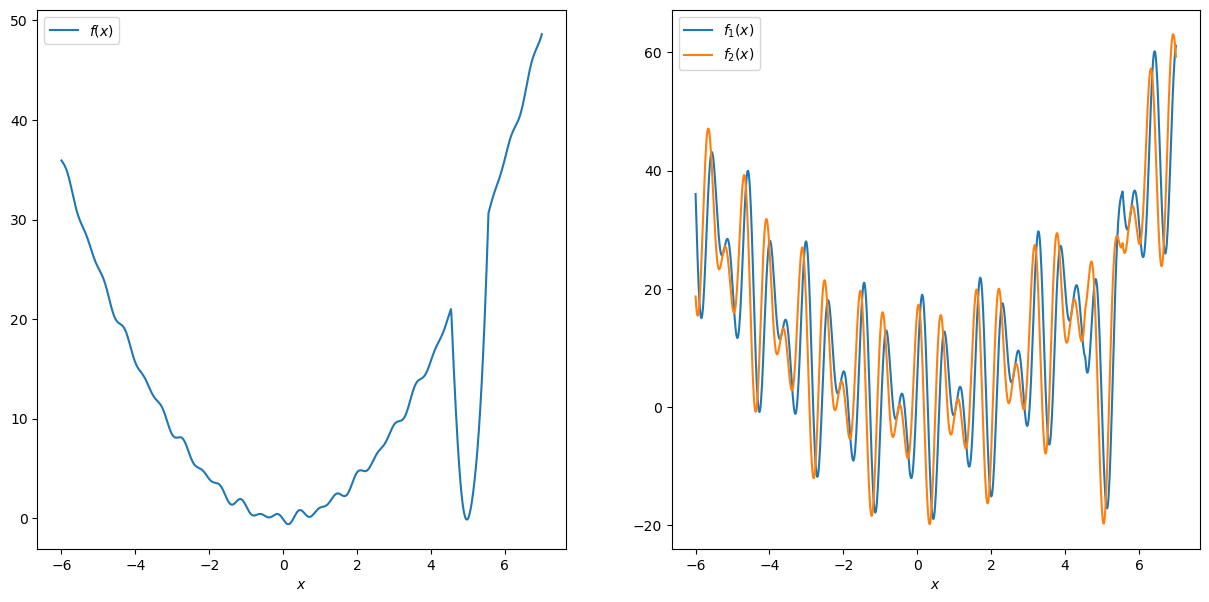

In [174]:
from functools import partial

def loss_term(phase, x):
    if x < 50/11:
        value = x**2
    elif x < 50/9:
        value = 100*(x - 5)**2
    else:
        value = x**2
    return value + 20*np.sin(10*x + phase)*np.cos(2*(x - 5))

def derivative_of_loss_term(phase, x):
    if x < 50/11:
        value = 2*x
    elif x < 50/9:
        value = 200*(x - 5)
    else:
        value = 2*x
    return value + 20*(10*np.cos(10*x + phase)*np.cos(2*(x - 5)) - 2*np.sin(10*x + phase)*np.sin(2*(x - 5)))

N = 2000 # the number of summands
np.random.seed(0)
phases = 2 * np.pi * np.random.rand(N)

# The induvidual summands f_i as a list
f_i_s = list(map(lambda phase : np.vectorize(partial(loss_term, phase)), phases))

# The function f
f = np.vectorize(lambda x : np.mean([f_i(x) for f_i in f_i_s]))

# Derivatives are provided for convenience
derivative_f_i_s = list(map(lambda phase : np.vectorize(partial(derivative_of_loss_term, phase)), phases))
derivative_f = np.vectorize(lambda x : np.mean([d_f_i(x) for d_f_i in derivative_f_i_s]))

x = np.linspace(-6, 7, num=1000)
y_1 = f_i_s[0](x)
y_2 = f_i_s[1](x)
y = f(x)

fig, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].plot(x, y)
axes[0].legend(["$f(x)$"])
axes[0].set_xlabel('$x$')
axes[1].plot(x, y_1)
axes[1].plot(x, y_2)
axes[1].legend(["$f_{1}(x)$", "$f_{2}(x)$"])
axes[1].set_xlabel('$x$');

Note that the function $f$ has a flat minimum close to $0$ and a sharp minimum close to $5$. Implement both GD and SGD for this problem: 

- Start at $x_{0}=5$, i.e., close to the sharp minimum. 
- Let both GD and SGD go for $2000$ iterations.
- Use the same constant step size $\gamma_{k} = 0.001$ for SGD and GD. 
- You should notice that SDG manages to escape the sharp minimum and find the flat minimum (most of the time), while GD does not. Illustrate this by plotting $x_{k}$ as a function of $k$ for both methods.  (Common mistake: We are not asking for $f(x_k)$ vs $x_k$.)

Give some brief comments.

__Solution:__

_Fill in your solution here!_

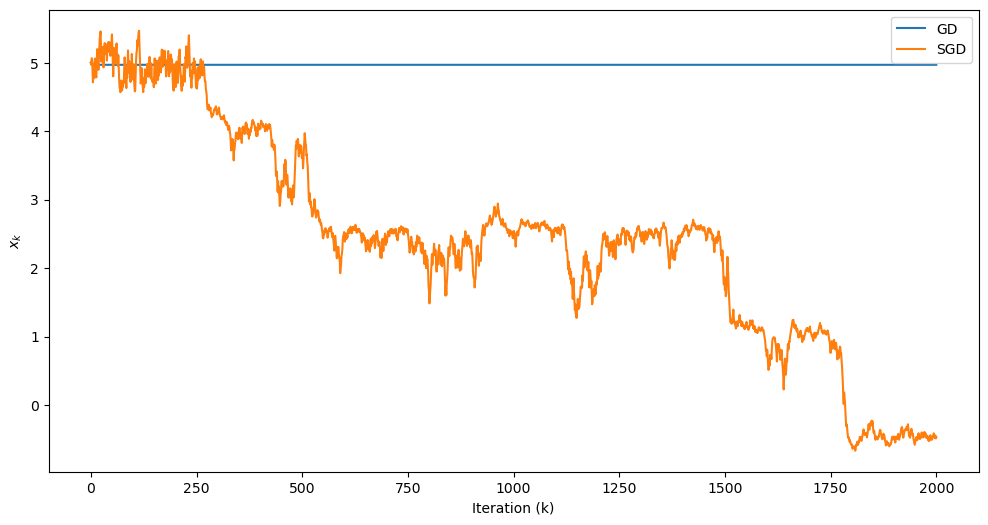

In [175]:

def gradient_descent(x0, lr, num_iters, gradient_fn):
    x = [x0]
    for _ in range(num_iters):
        x_new = x[-1] - lr * gradient_fn(x[-1])
        x.append(x_new)
    return x

def stochastic_gradient_descent(x0, lr, num_iters, gradient_fns):
    x = [x0]
    for _ in range(num_iters):
        i = np.random.randint(len(gradient_fns))
        grad_fn = gradient_fns[i]
        x_new = x[-1] - lr * grad_fn(x[-1])
        x.append(x_new)
    return x

x0 = 5
lr = 0.001
num_iters = 2000

x_gd = gradient_descent(x0, lr, num_iters, derivative_f)
x_sgd = stochastic_gradient_descent(x0, lr, num_iters, derivative_f_i_s)

plt.figure(figsize=(12,6))
plt.plot(x_gd, label='GD')
plt.plot(x_sgd, label='SGD')
plt.xlabel('Iteration (k)')
plt.ylabel('$x_k$')
plt.legend()
plt.show()

The GD curve remains almost flat across all iterations. This means that GD quickly gets trapped in the sharp minimum and doesn't make progress away from it, which is consistent with the theoretical understanding that GD can get stuck in sharp minima. However the SGD seems to initialy get stuck at the sharp minima but after around 750 iteration moves away towards the flat minima which can be better at generalzation. The SDG seems to start to converge towards zero which is the flat minima. 